In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

In [2]:
feats = pd.read_csv("../System/feats_train.csv")
fakes = pd.read_csv("../System/fake_news_feats_train.csv")
bop = pd.read_csv("../System/bop_train.csv")
fake_bop = pd.read_csv("../System/fake_news_bop_train.csv")

feats.head(3)

index  superlatives  degree_adverbs  comparative_adverbs  proper_nouns  \
0      1      0.002488        0.007463             0.004975      0.069652   
1      2      0.000000        0.002618             0.002618      0.052356   
2      3      0.004255        0.004255             0.000000      0.042553   

      dates   numbers  fp_pronouns  negations  pos_emotion  ...    ap_num  \
0  0.000000  0.012438     0.007463   0.000000     0.009950  ...       1.0   
1  0.000000  0.000000     0.015707   0.010471     0.002618  ...       1.0   
2  0.017021  0.008511     0.004255   0.017021     0.017021  ...       1.0   

   ap_date  ap_title  alliteration  profanity  lexical_diversity  \
0      0.0       0.0      0.000000   0.000000           0.613692   
1      0.0       0.0      0.166667   0.002577           0.590206   
2      0.0       0.0      0.000000   0.000000           0.566667   

   lexical_density  function_words  spelling_errors  class  
0         0.589242        0.410758         0.029340      1  
1         0.597938        0.402062         0.064433      1  
2         0.575000        0.425000         0.016667      1  

[3 rows x 44 columns]

Separate the two classes.

In [3]:
af = feats.loc[feats['class'] == 1]
naf = feats.loc[feats['class'] == 0]

fak = fakes.loc[fakes['class'] == 1]
gen = fakes.loc[fakes['class'] == 0]

af_bop = bop.loc[bop['class'] == 1]
naf_bop = bop.loc[bop['class'] == 0]

fak_bop = fake_bop.loc[fake_bop['class'] == 1]
gen_bop = fake_bop.loc[fake_bop['class'] == 0]

In [4]:
af.describe()

index  superlatives  degree_adverbs  comparative_adverbs  \
count  519.000000    519.000000      519.000000           519.000000   
mean   260.000000      0.002789        0.005654             0.002505   
std    149.966663      0.003360        0.005386             0.003188   
min      1.000000      0.000000        0.000000             0.000000   
25%    130.500000      0.000000        0.001990             0.000000   
50%    260.000000      0.001905        0.004587             0.001597   
75%    389.500000      0.004329        0.007874             0.004036   
max    519.000000      0.019663        0.036765             0.025641   

       proper_nouns       dates     numbers  fp_pronouns   negations  \
count    519.000000  519.000000  519.000000   519.000000  519.000000   
mean       0.045285    0.002288    0.016981     0.013827    0.005906   
std        0.026162    0.004327    0.013671     0.013405    0.005313   
min        0.000000    0.000000    0.000000     0.000000    0.000000   
25%        0.026650    0.000000    0.007868     0.004049    0.002210   
50%        0.040892    0.000000    0.014263     0.010989    0.005000   
75%        0.061381    0.003466    0.021476     0.019231    0.008639   
max        0.204918    0.046296    0.107143     0.099415    0.034483   

       pos_emotion  ...        ap_num     ap_date    ap_title  alliteration  \
count   519.000000  ...    519.000000  519.000000  519.000000    519.000000   
mean      0.005408  ...      0.647399    0.552987    0.210019      0.046217   
std       0.005975  ...      0.478241    0.497664    0.407715      0.093405   
min       0.000000  ...      0.000000    0.000000    0.000000      0.000000   
25%       0.000000  ...      0.000000    0.000000    0.000000      0.000000   
50%       0.004082  ...      1.000000    1.000000    0.000000      0.000000   
75%       0.007722  ...      1.000000    1.000000    0.000000      0.083333   
max       0.041667  ...      1.000000    1.000000    1.000000      0.666667   

        profanity  lexical_diversity  lexical_density  function_words  \
count  519.000000         519.000000       519.000000      519.000000   
mean     0.000456           0.582009         0.578727        0.421273   
std      0.001707           0.078379         0.040835        0.040835   
min      0.000000           0.339369         0.463557        0.211982   
25%      0.000000           0.529666         0.551809        0.398675   
50%      0.000000           0.585202         0.578125        0.421875   
75%      0.000000           0.632993         0.601325        0.448191   
max      0.015094           0.818182         0.788018        0.536443   

       spelling_errors  class  
count       519.000000  519.0  
mean          0.037709    1.0  
std           0.027123    0.0  
min           0.000000    1.0  
25%           0.020018    1.0  
50%           0.033019    1.0  
75%           0.049876    1.0  
max           0.236842    1.0  

[8 rows x 44 columns]

In [5]:
naf.describe()

index  superlatives  degree_adverbs  comparative_adverbs  \
count   519.000000    519.000000      519.000000           519.000000   
mean    779.000000      0.003323        0.005570             0.002663   
std     149.966663      0.004265        0.004400             0.002869   
min     520.000000      0.000000        0.000000             0.000000   
25%     649.500000      0.000000        0.002373             0.000000   
50%     779.000000      0.002183        0.005013             0.002212   
75%     908.500000      0.004759        0.008118             0.004032   
max    1038.000000      0.035398        0.022727             0.019231   

       proper_nouns       dates     numbers  fp_pronouns   negations  \
count    519.000000  519.000000  519.000000   519.000000  519.000000   
mean       0.052455    0.003398    0.021487     0.008662    0.005741   
std        0.029601    0.004847    0.013987     0.010425    0.004824   
min        0.000000    0.000000    0.000000     0.000000    0.000000   
25%        0.033491    0.000000    0.011461     0.001299    0.001553   
50%        0.047904    0.001580    0.018868     0.005420    0.005128   
75%        0.066108    0.004781    0.028399     0.011780    0.008606   
max        0.297297    0.043257    0.111111     0.065123    0.022951   

       pos_emotion  ...        ap_num     ap_date    ap_title  alliteration  \
count   519.000000  ...    519.000000  519.000000  519.000000    519.000000   
mean      0.003921  ...      0.593449    0.687861    0.156069      0.059709   
std       0.004779  ...      0.491664    0.463813    0.363271      0.096969   
min       0.000000  ...      0.000000    0.000000    0.000000      0.000000   
25%       0.000000  ...      0.000000    0.000000    0.000000      0.000000   
50%       0.002656  ...      1.000000    1.000000    0.000000      0.000000   
75%       0.005618  ...      1.000000    1.000000    0.000000      0.111111   
max       0.030227  ...      1.000000    1.000000    1.000000      0.500000   

        profanity  lexical_diversity  lexical_density  function_words  \
count  519.000000         519.000000       519.000000      519.000000   
mean     0.000392           0.528092         0.581274        0.418726   
std      0.001797           0.082897         0.042219        0.042219   
min      0.000000           0.227764         0.453782        0.256410   
25%      0.000000           0.473215         0.551900        0.392173   
50%      0.000000           0.524355         0.577697        0.422303   
75%      0.000000           0.580969         0.607827        0.448100   
max      0.025575           0.759690         0.743590        0.546218   

       spelling_errors  class  
count       519.000000  519.0  
mean          0.034004    0.0  
std           0.024853    0.0  
min           0.000000    0.0  
25%           0.015873    0.0  
50%           0.028186    0.0  
75%           0.045849    0.0  
max           0.165625    0.0  

[8 rows x 44 columns]

In [6]:
def plot_feature_density(feat_name, AF=af, NAF=naf):
    feat = feats.loc[:, feat_name]
    af_feat = AF.loc[:, feat_name]
    naf_feat = NAF.loc[:, feat_name]
    
    fig, ax = plt.subplots()
    af_feat.plot.density(label='AF', ax=ax, figsize=(10,5), color='aqua')
    naf_feat.plot.density(label='NAF', ax=ax, color='coral')
    plt.legend()
    ax.set_xlabel(feat_name)
    plt.show()

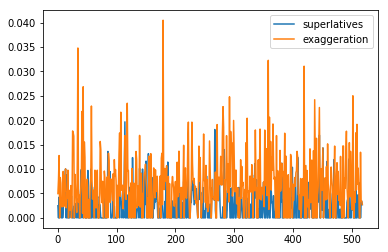

In [7]:
af.loc[:, ['superlatives', 'exaggeration']].plot()

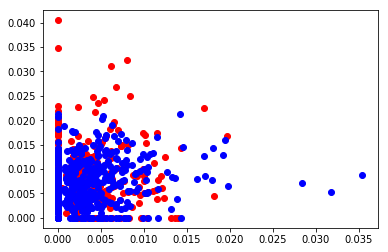

In [8]:
plt.plot(af.superlatives, af.exaggeration, 'ro')
plt.plot(naf.superlatives, naf.exaggeration, 'bo')
plt.show()

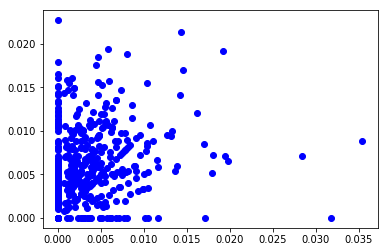

In [9]:
plt.plot(naf.superlatives, naf.degree_adverbs, 'bo')
plt.show()

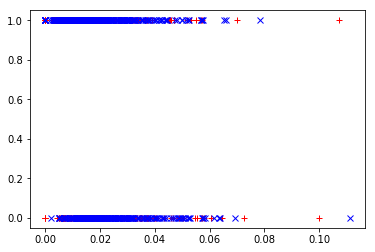

In [10]:
plt.plot(af.numbers, af.ap_num, 'r+')
plt.plot(naf.numbers, naf.ap_num, 'bx')
plt.show()

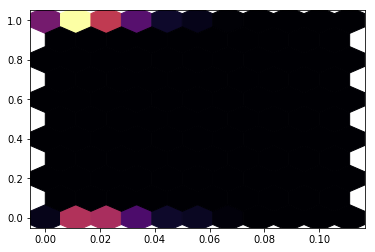

In [11]:
plt.hexbin(feats.numbers, feats.ap_num, gridsize=10, cmap='inferno')
plt.show()

In [12]:
def ANOVA(feature, FEATS=feats):
    #Create a boxplot
    FEATS.boxplot(feature, by='class', figsize=(12, 8))

    grps = pd.unique(FEATS['class'].values)
    d_data = {grp:FEATS[feature][FEATS['class'] == grp] for grp in grps}

    k = len(pd.unique(FEATS['class']))  # number of conditions
    N = len(FEATS.values)  # conditions times participants
    n = FEATS.groupby('class').size()[0] #Participants in each condition
    F, p = stats.f_oneway(d_data[0], d_data[1])
    return F, p


In [13]:
def box_plot_compare(feature, FEATS1, FEATS2):
    fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(18,8), sharey=True)
    #Create a boxplot
    FEATS1.boxplot(feature, by='class', ax=ax1)
    FEATS2.boxplot(feature, by='class', ax=ax2)
    
    ax1.set_xticklabels(["Real", "AF"])
    ax2.set_xticklabels(["Real", "Fake"])
    plt.show()

def feature_density_compare(feat_name):
    af_feat = af.loc[:, feat_name]
    naf_feat = naf.loc[:, feat_name]
    
    fake_feat = fak.loc[:, feat_name]
    real_feat = gen.loc[:, feat_name]
    
    fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(18, 8), sharey=True, sharex=True)
    
    af_feat.plot.density(label='AF', ax=ax1, color='aqua', linewidth=5)
    naf_feat.plot.density(label='NAF', ax=ax1, color='coral', linestyle='--', linewidth=5)
    ax1.set_xlabel(feat_name, fontsize=16)
    ax1.tick_params(labelsize=16)
    
    fake_feat.plot.density(label='Fake', ax=ax2, color='aqua', linewidth=5)
    real_feat.plot.density(label='Real', ax=ax2, color='coral', linestyle='--', linewidth=5)
    plt.legend()
    ax2.set_xlabel(feat_name, fontsize=16)
    ax2.tick_params(labelsize=16)
    
    ax1.set_ylabel('Density', fontsize=16)
    
#     ax1.set_xticklabels([])
#     ax2.set_xticklabels([])
    
    plt.show()
    return fig

In [14]:
def shaded_density_plot(feat_name):
    af_feat = af.loc[:, feat_name]
    naf_feat = naf.loc[:, feat_name]
    
    fake_feat = fak.loc[:, feat_name]
    real_feat = gen.loc[:, feat_name]
    
    fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(18, 8), sharey=True, sharex=True)
    
    sns.distplot(af_feat, hist=False, kde=True, label='April Fool', ax=ax1,
                 kde_kws={'linewidth': 4, 'shade': True})
    sns.distplot(naf_feat, hist=False, kde=True, label='Genuine', ax=ax1,
                 kde_kws={'linewidth': 4, 'shade': True, 'linestyle': '--'})
#     ax1.set_xlabel(feat_name, fontsize=25)
#     ax1.set_xlabel("")
    ax1.xaxis.label.set_visible(False)
    ax1.tick_params(labelsize=25)
    
    sns.distplot(fake_feat, hist=False, kde=True, label='Fake', ax=ax2,
                 kde_kws={'linewidth': 4, 'shade': True})
    sns.distplot(real_feat, hist=False, kde=True, label='Genuine', ax=ax2,
                 kde_kws={'linewidth': 4, 'shade': True, 'linestyle': '--'})
#     ax2.set_xlabel(feat_name, fontsize=25)
#     ax2.set_xlabel("")
    ax2.xaxis.label.set_visible(False)
    ax2.tick_params(labelsize=25)
    
    ax1.legend(prop={'size': 25})
    ax2.legend(prop={'size': 25})
    
#     ax1.set_ylabel('Density', fontsize=25)
    
    plt.show()
    return fig


def af_shaded_density_plot(feat_name):
    af_feat = af.loc[:, feat_name]
    naf_feat = naf.loc[:, feat_name]
    
    fig, ax1 = plt.subplots(figsize=(9, 8))
    
    sns.distplot(af_feat, hist=False, kde=True, label='April Fool', ax=ax1,
                 kde_kws={'linewidth': 4, 'shade': True})
    sns.distplot(naf_feat, hist=False, kde=True, label='Genuine', ax=ax1,
                 kde_kws={'linewidth': 4, 'shade': True, 'linestyle': '--'})
#     ax1.set_xlabel(feat_name, fontsize=25)
#     ax1.set_xlabel("")
    ax1.xaxis.label.set_visible(False)
    ax1.tick_params(labelsize=25)
    
    ax1.legend(prop={'size': 25})
    
#     ax1.set_ylabel('Density', fontsize=25)
    
    plt.show()
    return fig

def fake_shaded_density_plot(feat_name):
    fake_feat = fak.loc[:, feat_name]
    real_feat = gen.loc[:, feat_name]
    
    fig, ax1 = plt.subplots(figsize=(9, 8))
    
    sns.distplot(fake_feat, hist=False, kde=True, label='Fake News', ax=ax1,
                 kde_kws={'linewidth': 4, 'shade': True})
    sns.distplot(real_feat, hist=False, kde=True, label='Genuine', ax=ax1,
                 kde_kws={'linewidth': 4, 'shade': True, 'linestyle': '--'})
#     ax1.set_xlabel(feat_name, fontsize=25)
#     ax1.set_xlabel("")
    ax1.xaxis.label.set_visible(False)
    ax1.tick_params(labelsize=25)
    
    ax1.legend(prop={'size': 25})
    
#     ax1.set_ylabel('Density', fontsize=25)
    
    plt.show()
    return fig

def bop_shaded_density_plot(feat_name):
    af_feat = af_bop.loc[:, feat_name]
    naf_feat = naf_bop.loc[:, feat_name]
    
    fake_feat = fak_bop.loc[:, feat_name]
    real_feat = gen_bop.loc[:, feat_name]
    
    fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(18, 8), sharey=True, sharex=True)
    
    sns.distplot(af_feat, hist=False, kde=True, label='April Fool', ax=ax1,
                 kde_kws={'linewidth': 4, 'shade': True})
    sns.distplot(naf_feat, hist=False, kde=True, label='Genuine', ax=ax1,
                 kde_kws={'linewidth': 4, 'shade': True, 'linestyle': '--'})
#     ax1.set_xlabel(feat_name, fontsize=25)
#     ax1.set_xlabel("")
    ax1.xaxis.label.set_visible(False)
    ax1.tick_params(labelsize=25)
    
    sns.distplot(fake_feat, hist=False, kde=True, label='Fake', ax=ax2,
                 kde_kws={'linewidth': 4, 'shade': True})
    sns.distplot(real_feat, hist=False, kde=True, label='Genuine', ax=ax2,
                 kde_kws={'linewidth': 4, 'shade': True, 'linestyle': '--'})
#     ax2.set_xlabel(feat_name, fontsize=25)
#     ax2.set_xlabel("")
    ax2.xaxis.label.set_visible(False)
    ax2.tick_params(labelsize=25)
    
    ax1.legend(prop={'size': 25})
    ax2.legend(prop={'size': 25})
    
#     ax1.set_ylabel('Density', fontsize=25)
    
    plt.show()
    return fig



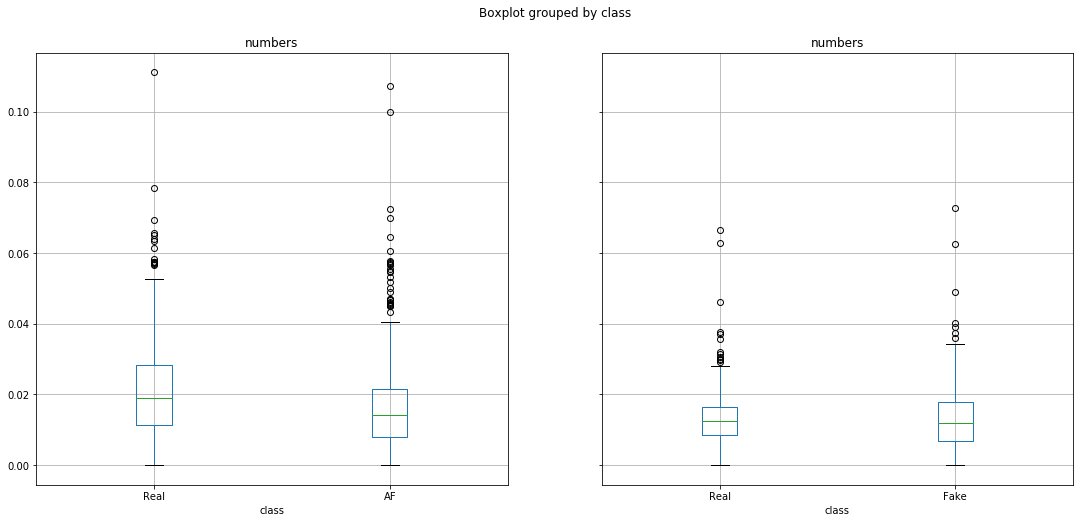

/home/ed/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


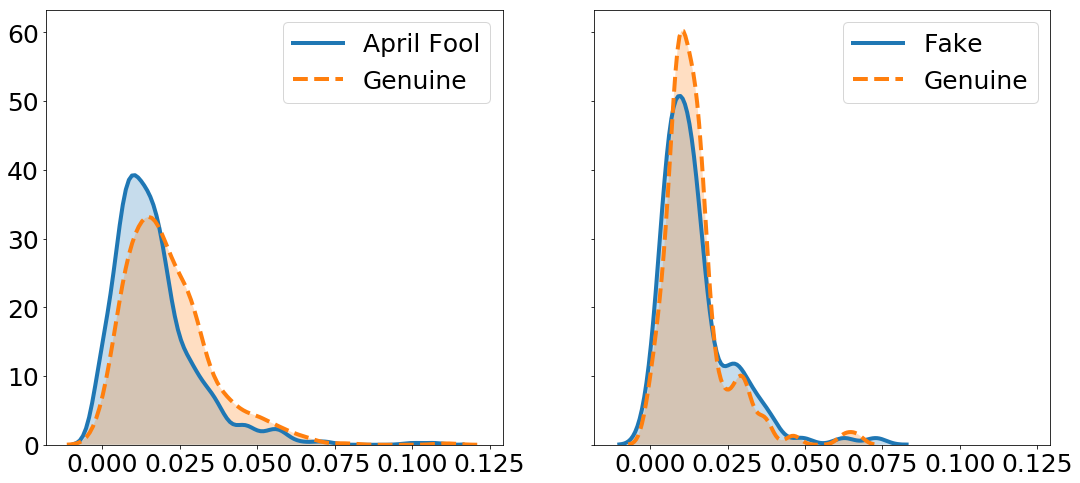

In [15]:
feature = 'numbers'
box_plot_compare(feature, feats, fakes)
fig = shaded_density_plot(feature)
fig.savefig("graphs/{}_density.pdf".format(feature), bbox_inches='tight')

/home/ed/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


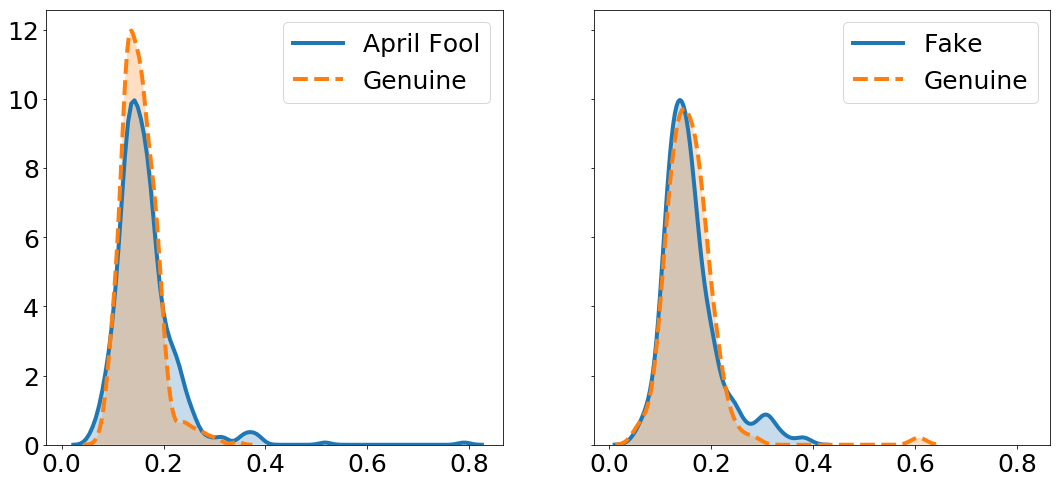

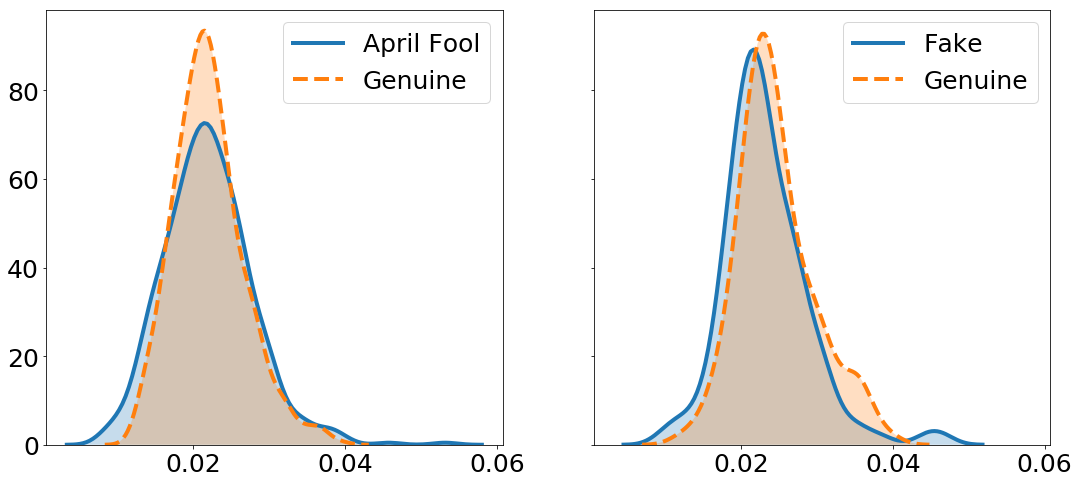

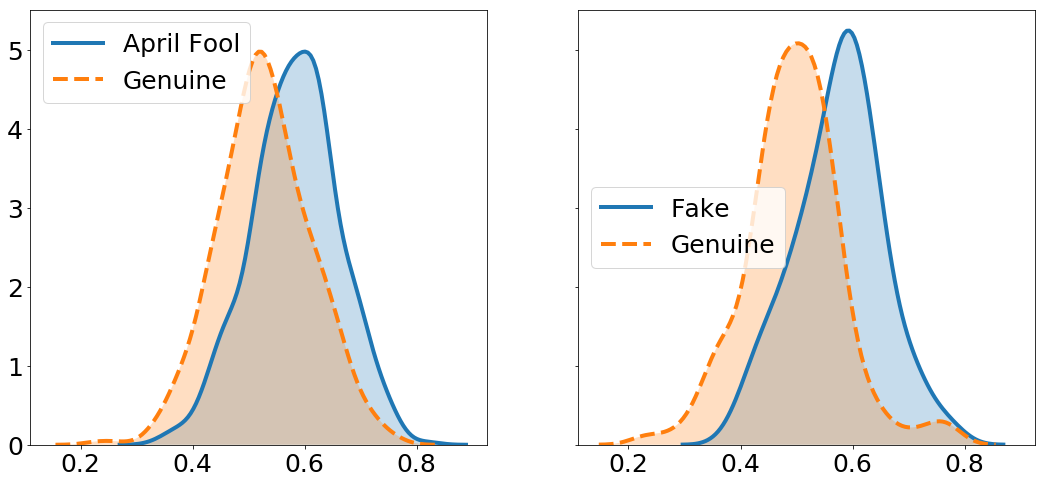

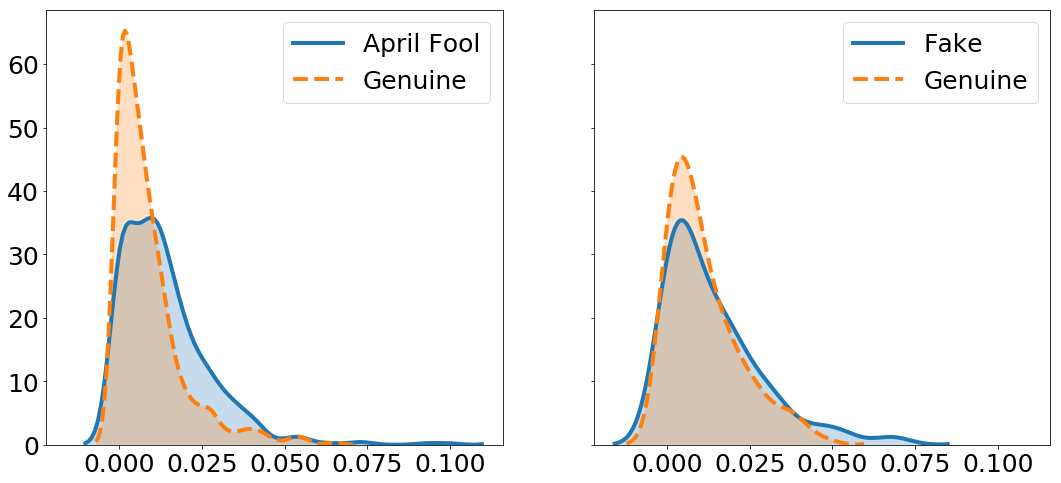

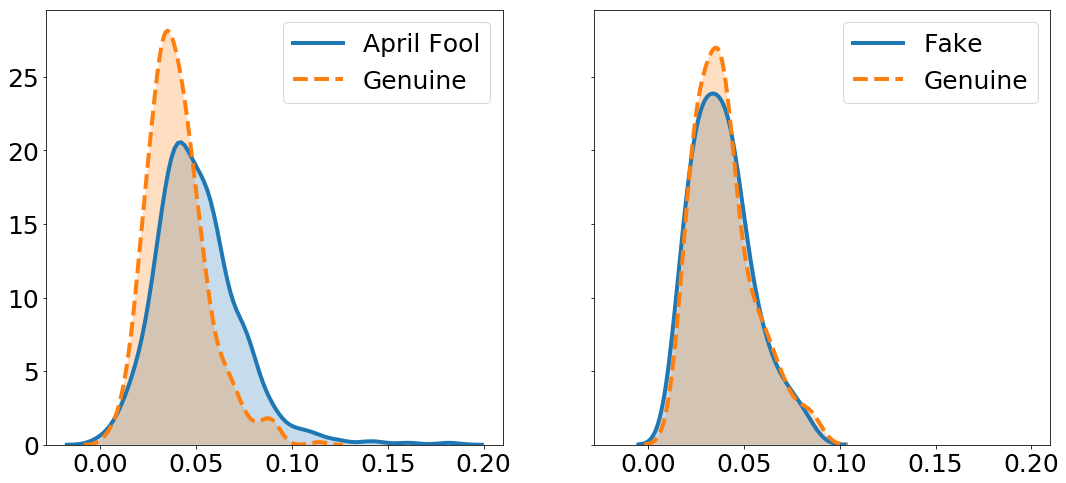

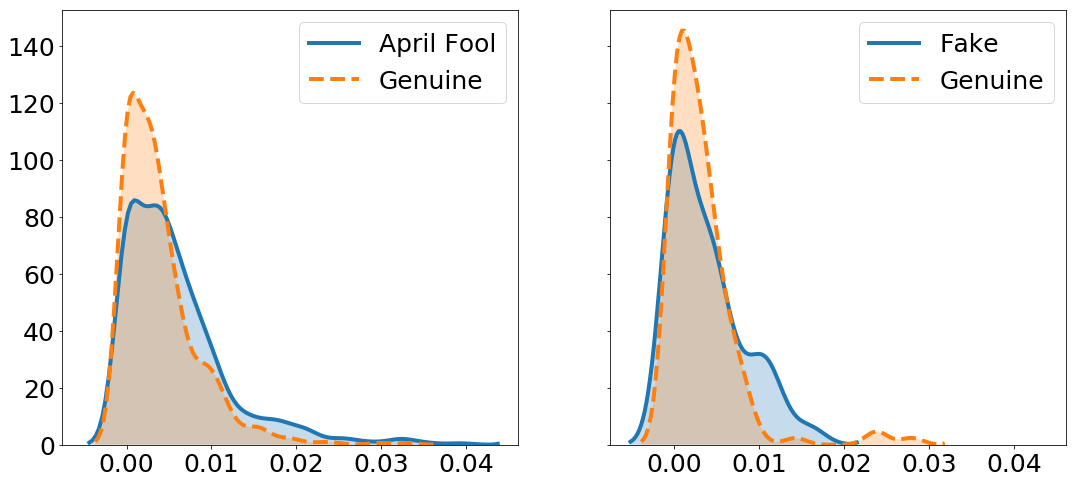

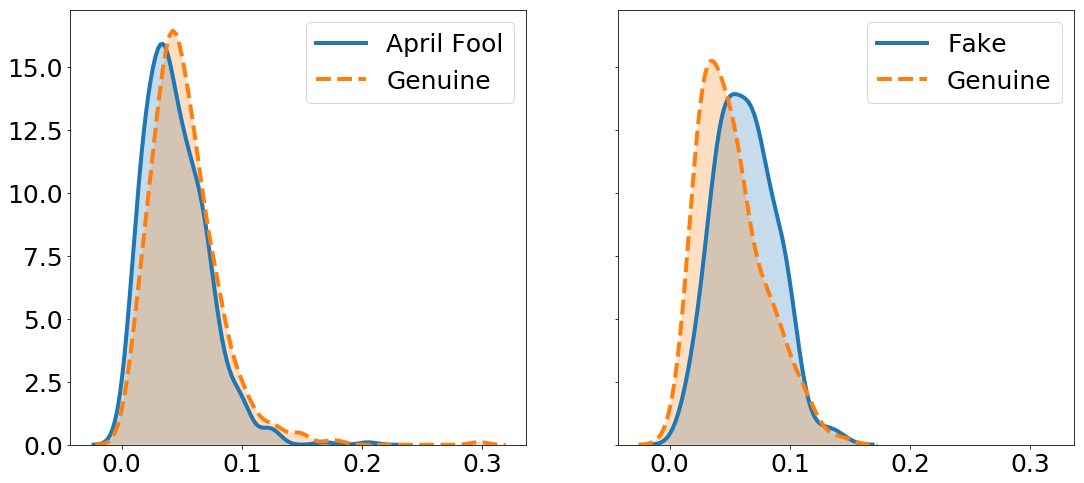

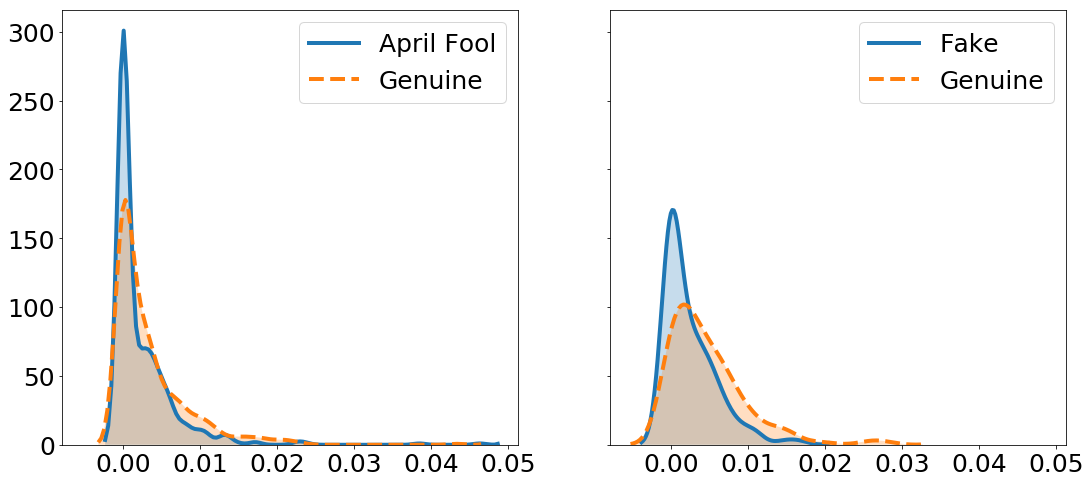

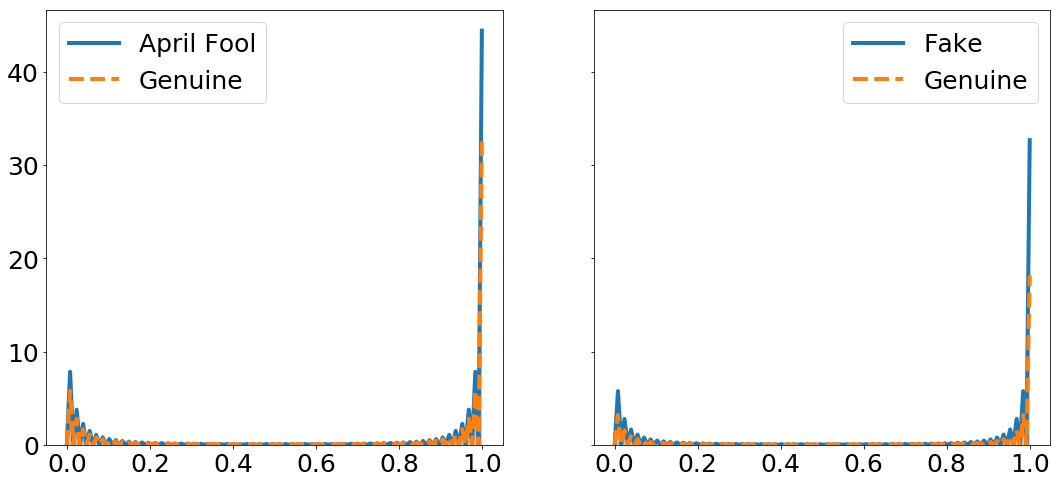

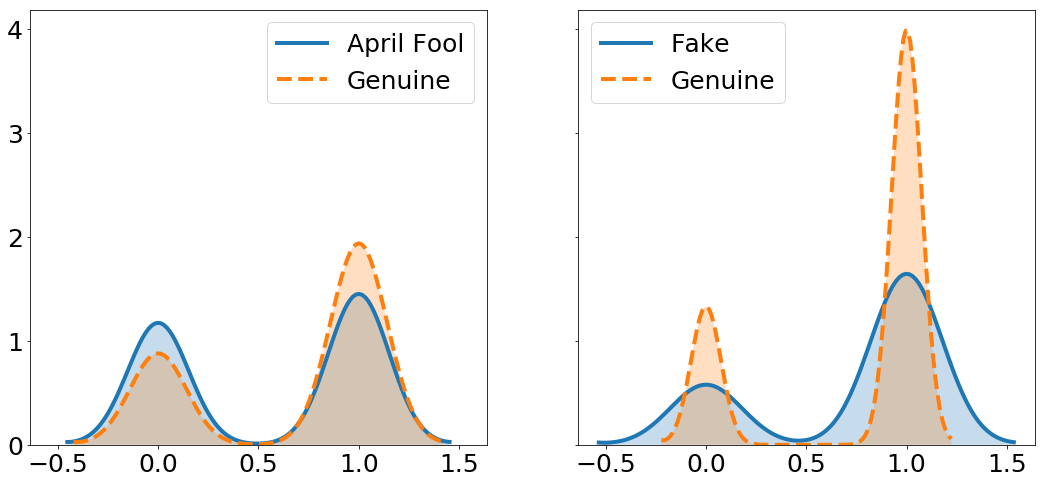

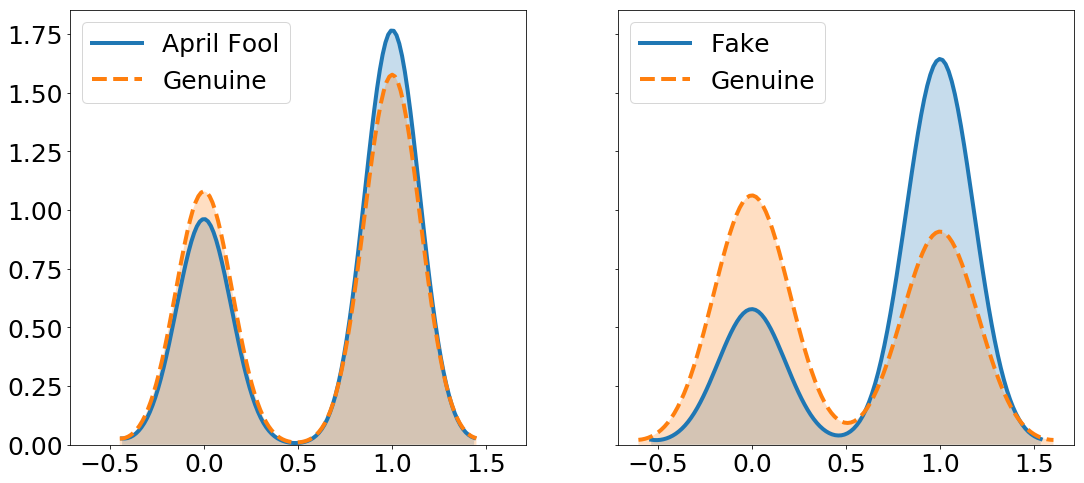

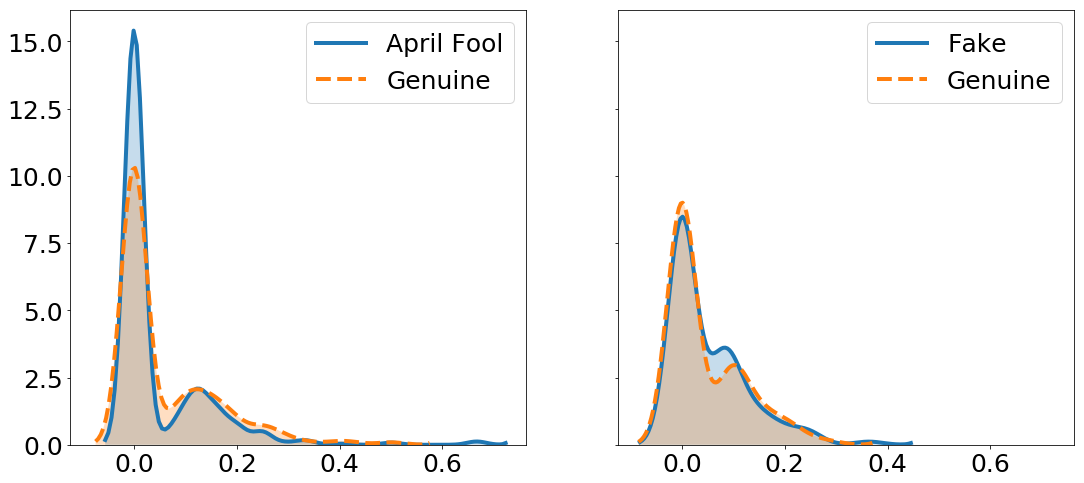

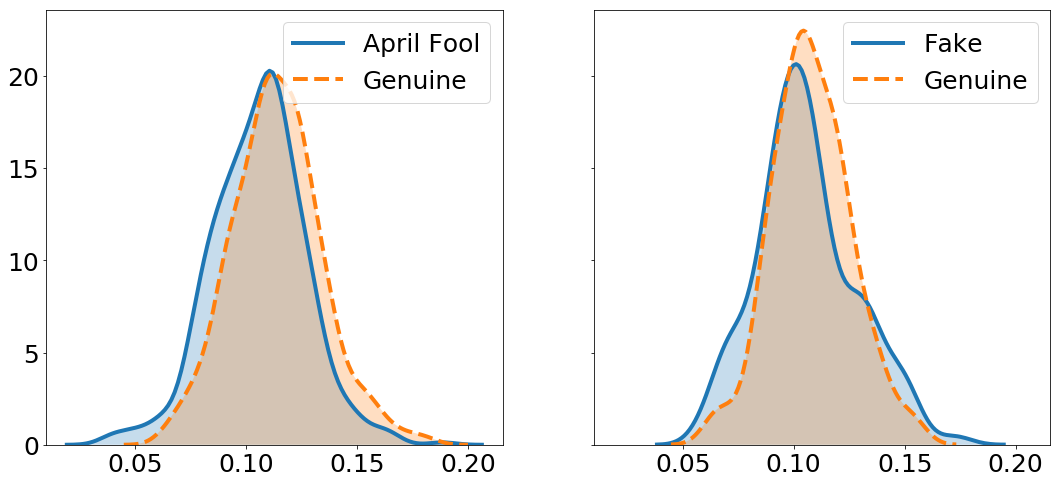

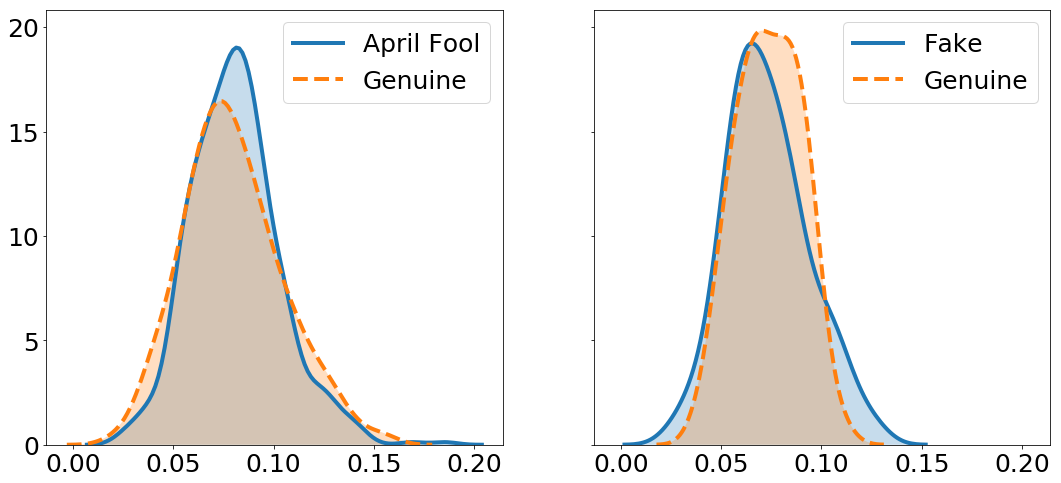

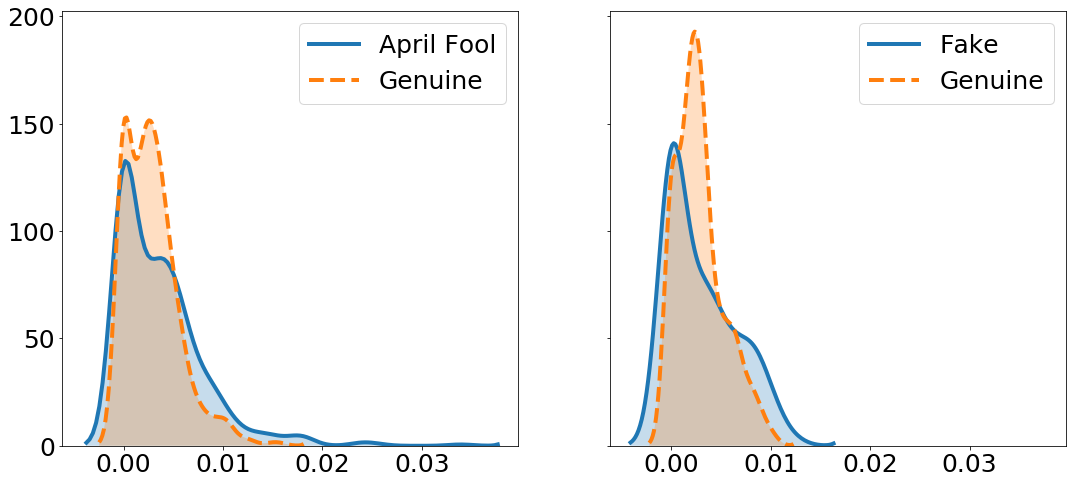

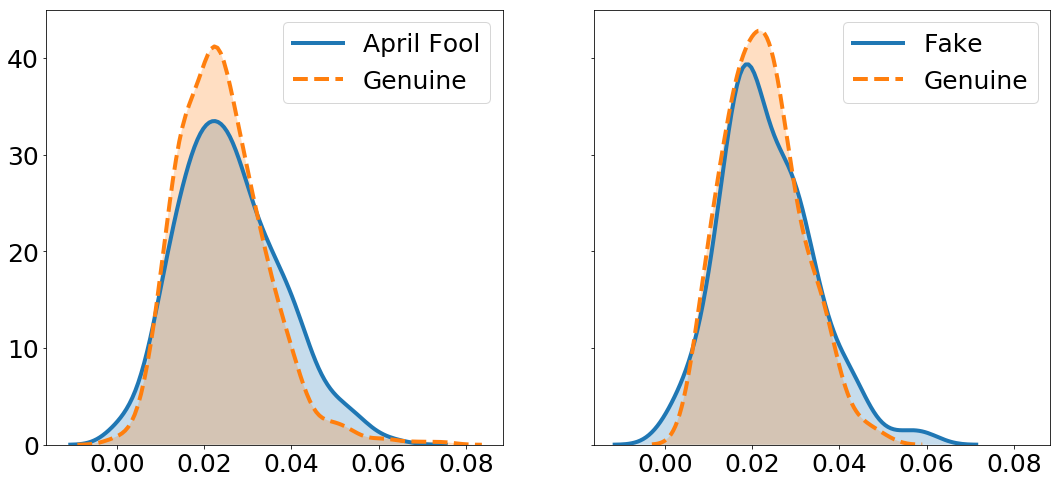

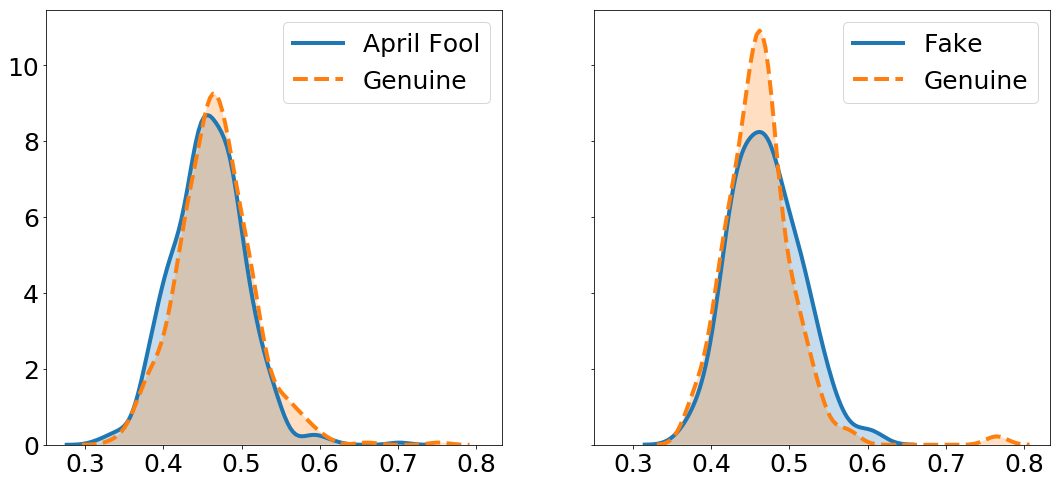

In [16]:
# Make density plots for selection features
selection_feats = ['avg_sentence_len', 'body_punctuation', 'lexical_diversity', 'fp_pronouns', 
                   'time_related', 'sense_words', 'proper_nouns', 'dates', 'ap_title', 'ap_date',
                   'ap_num', 'alliteration', 'preposition', 'adjectives', 'ima_determiners', 
                   'inf_verb', 'usas_ambiguity']
for feature in selection_feats:
    fig = shaded_density_plot(feature)
    fig.savefig("graphs/selection/{}_density.pdf".format(feature), bbox_inches='tight')

/home/ed/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


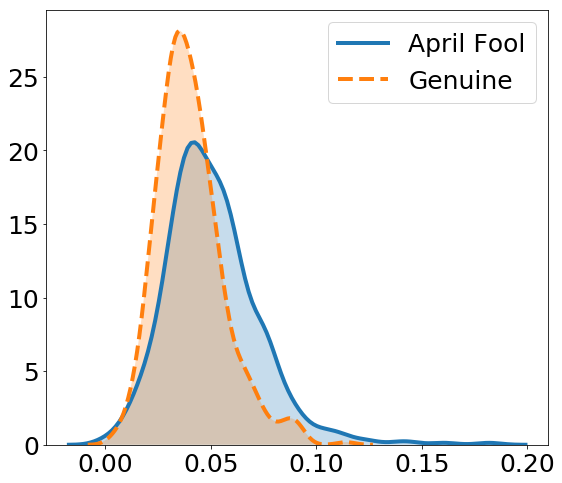

In [17]:
feature = 'time_related'
fig = af_shaded_density_plot(feature)
fig.savefig("graphs/af_{}_density.pdf".format(feature), bbox_inches='tight')

/home/ed/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


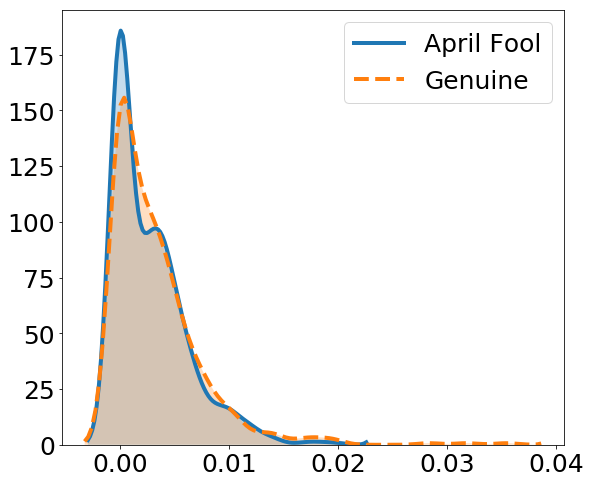

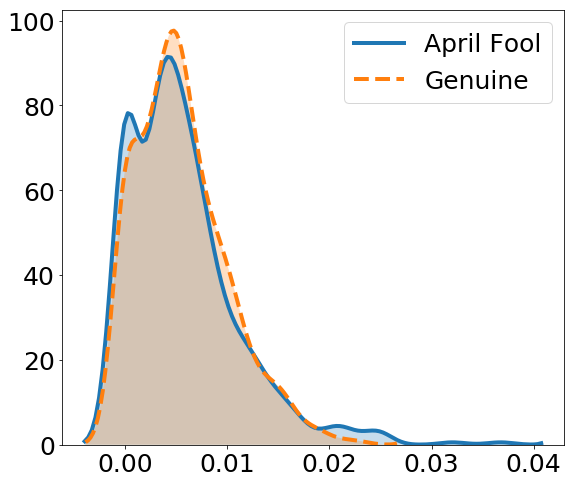

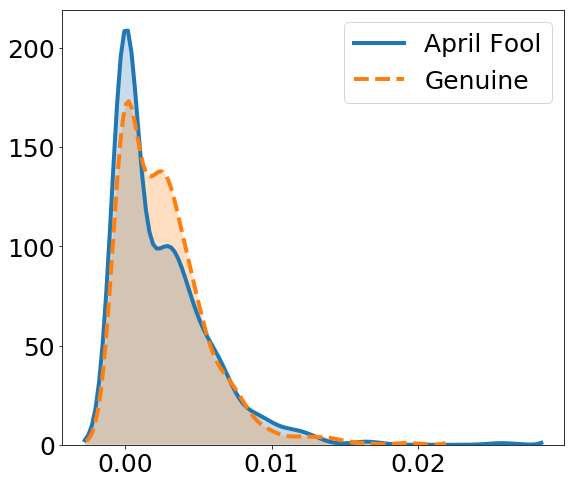

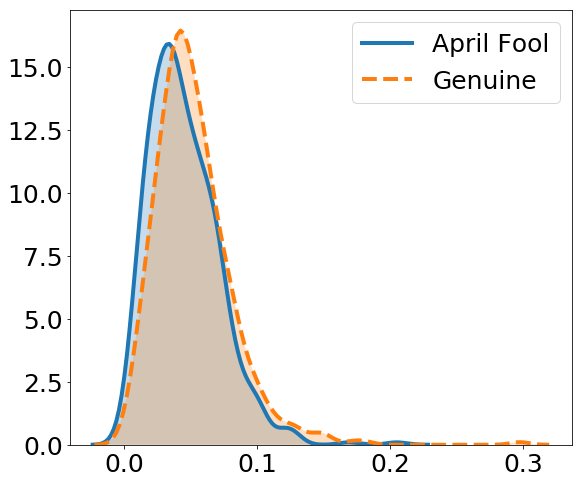

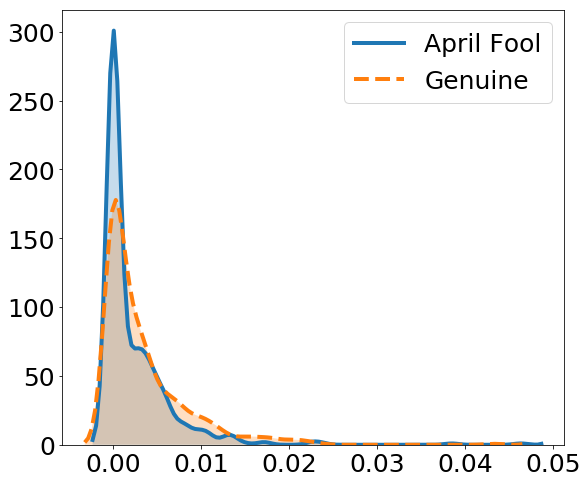

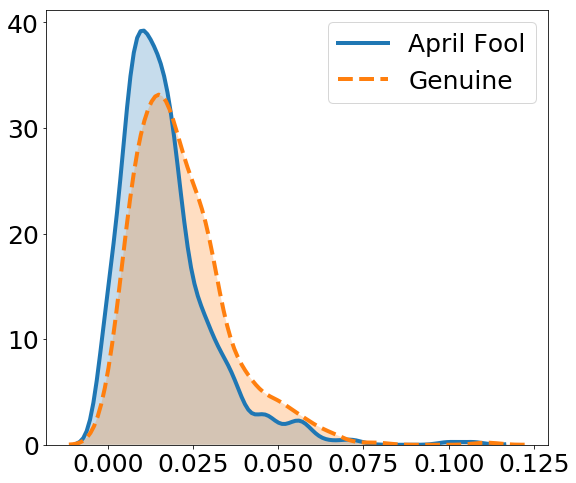

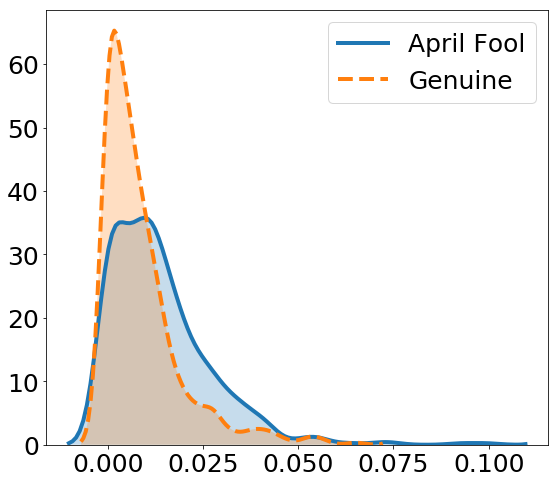

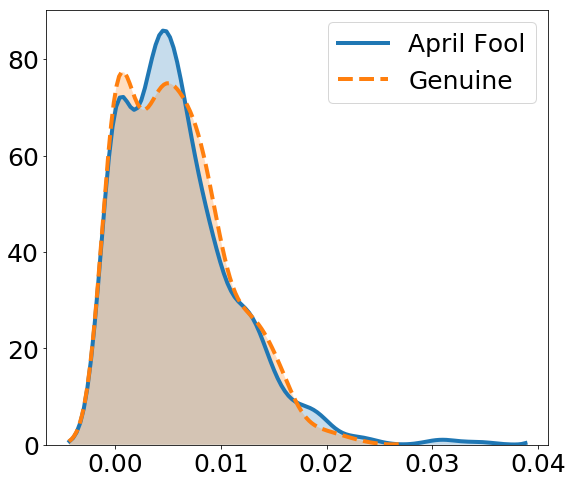

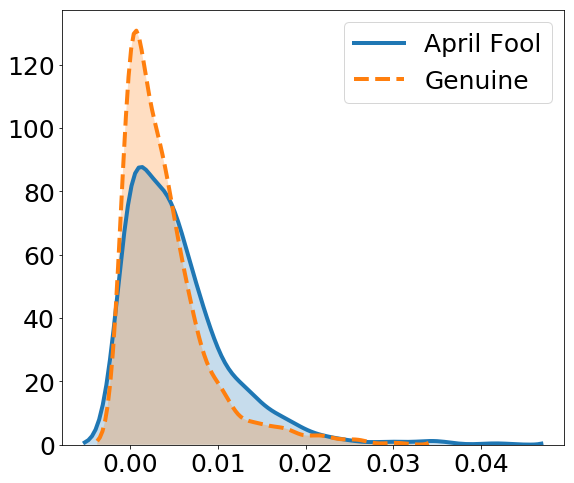

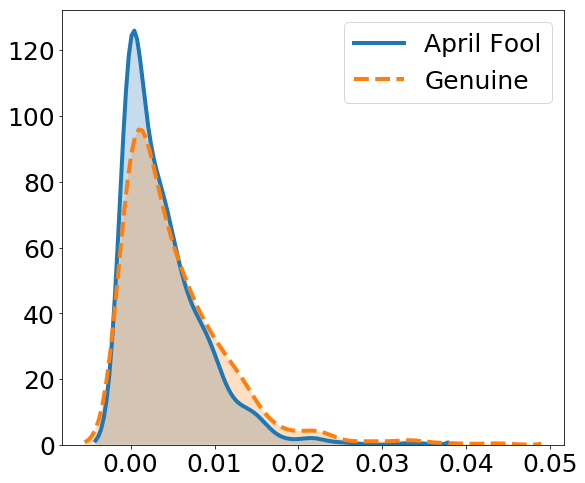

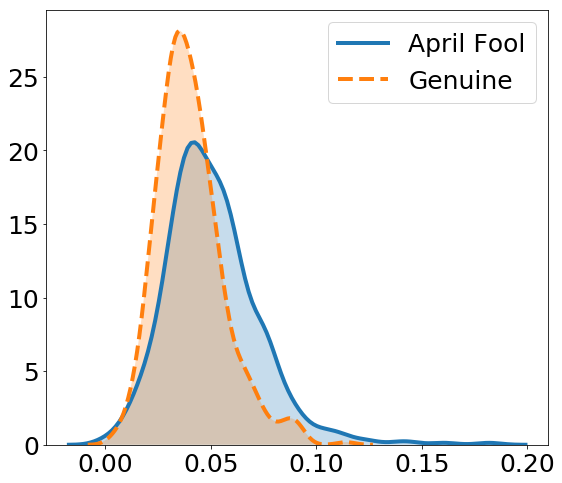

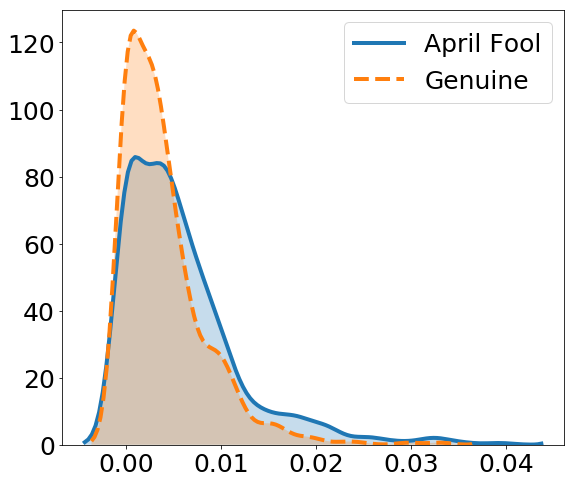

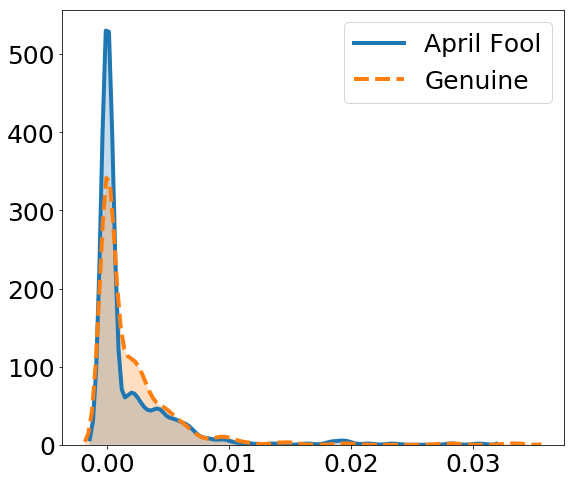

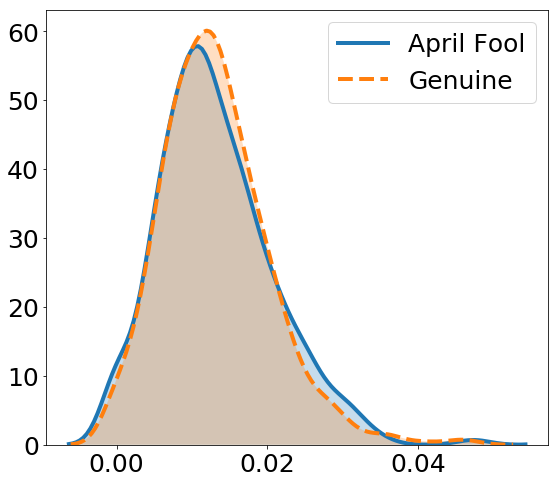

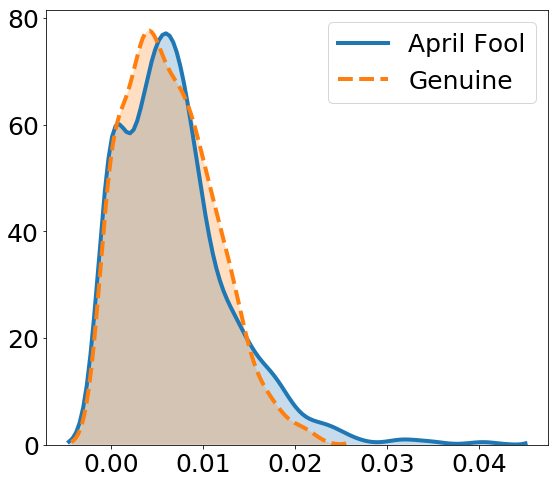

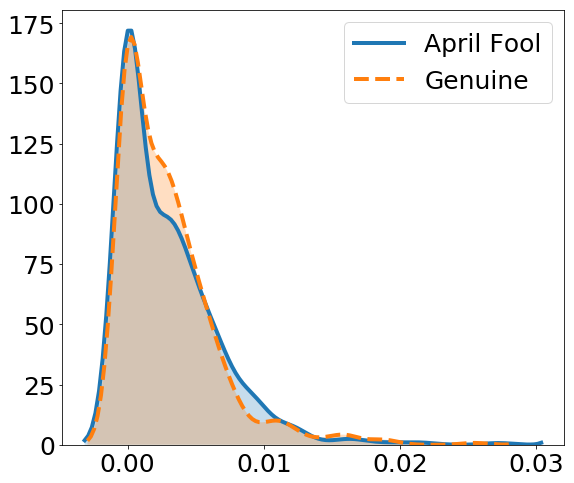

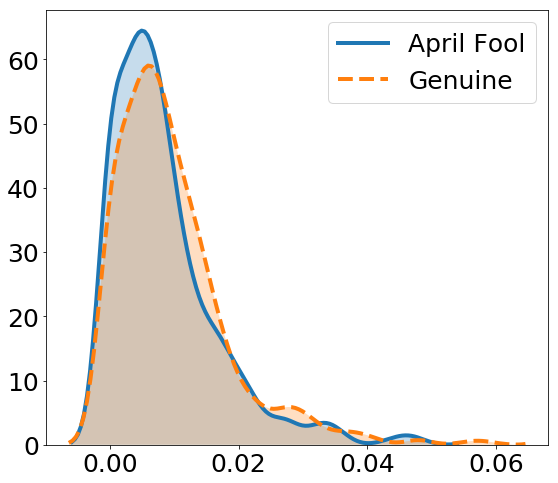

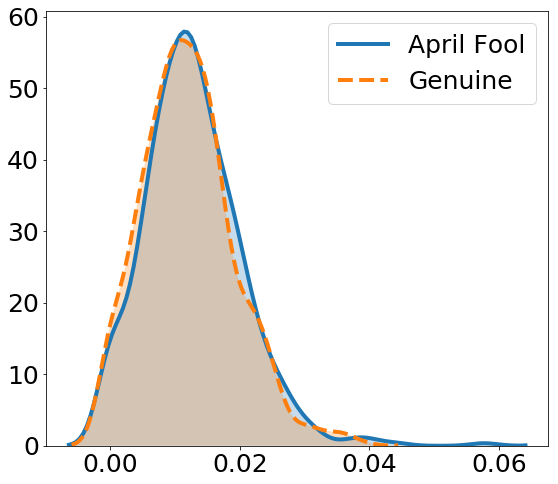

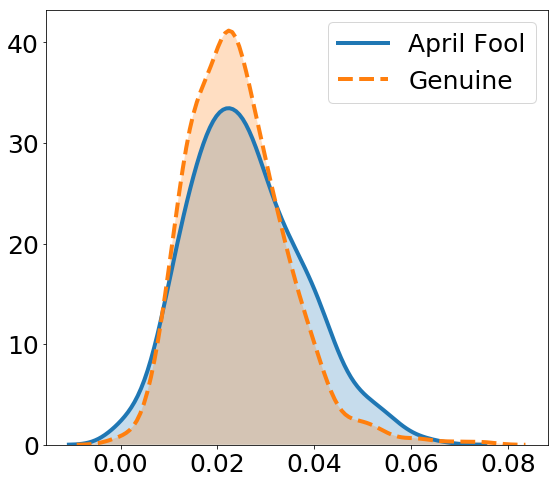

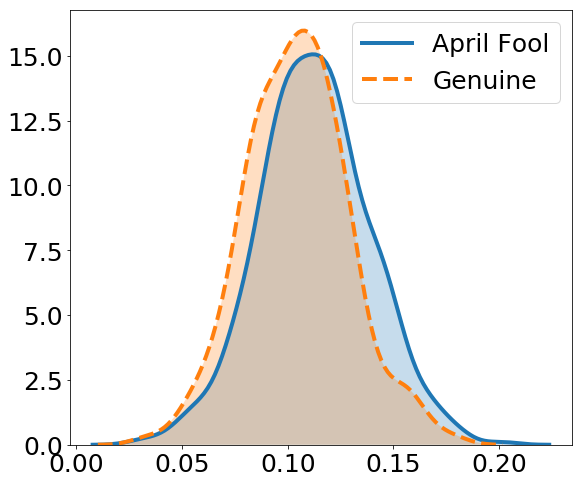

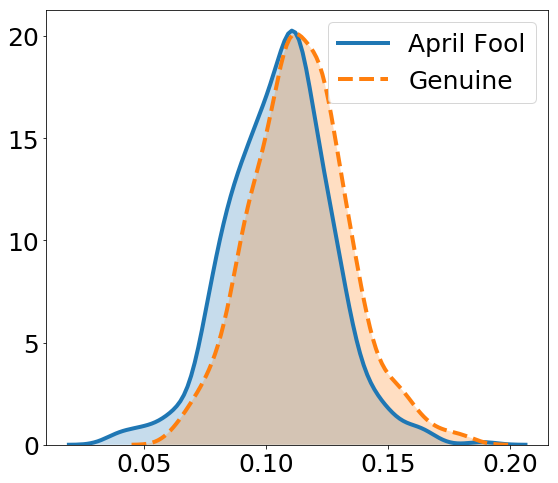

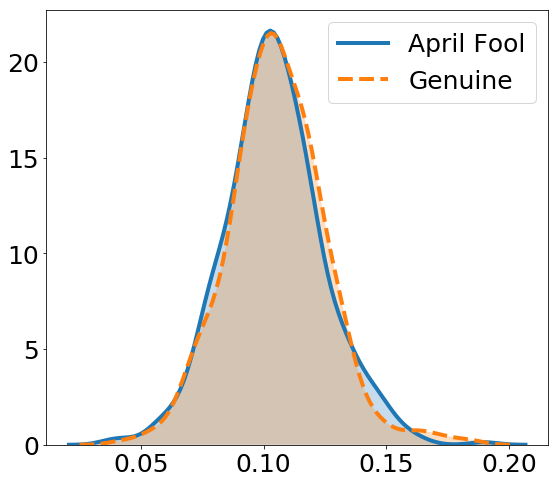

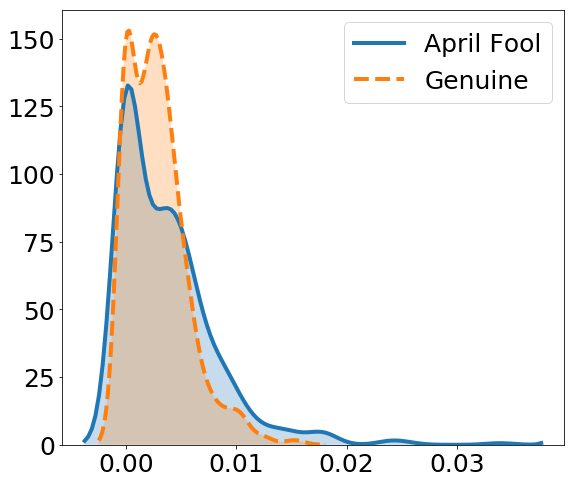

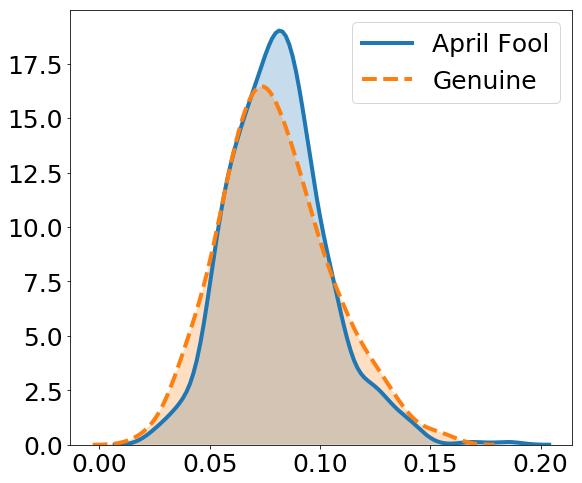

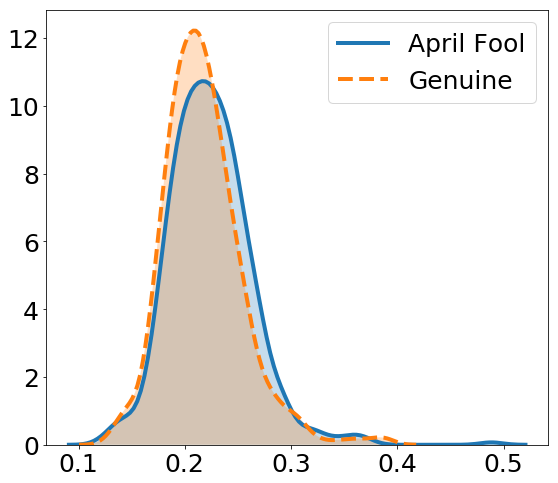

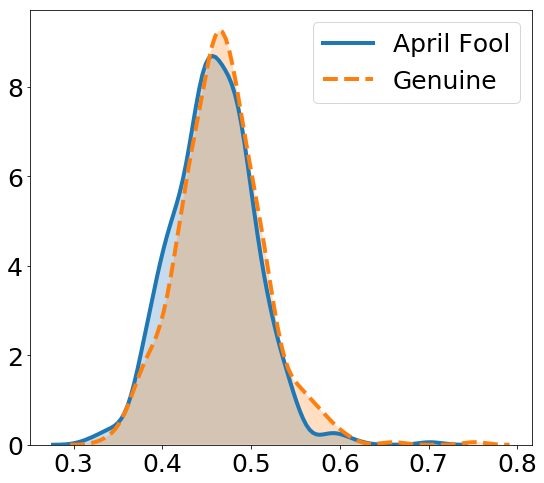

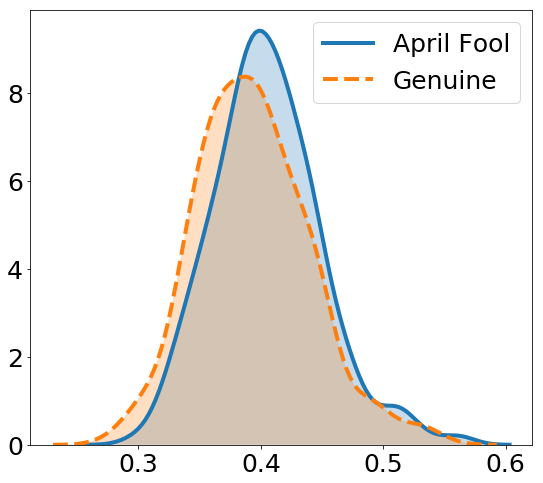

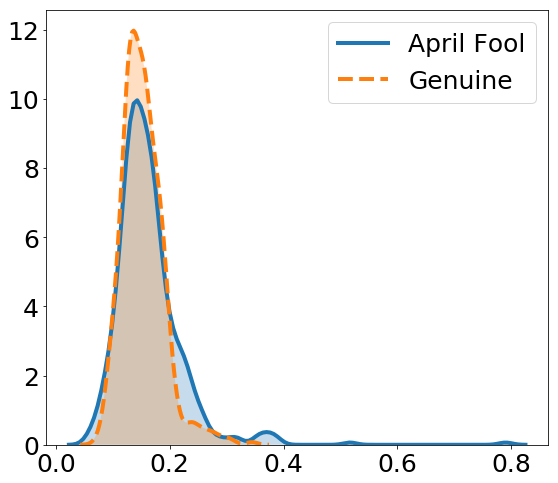

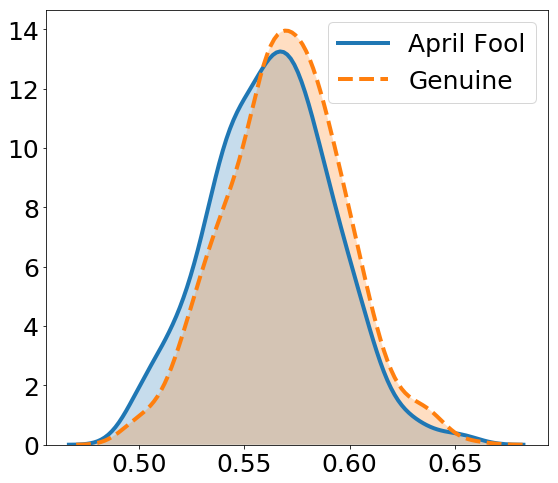

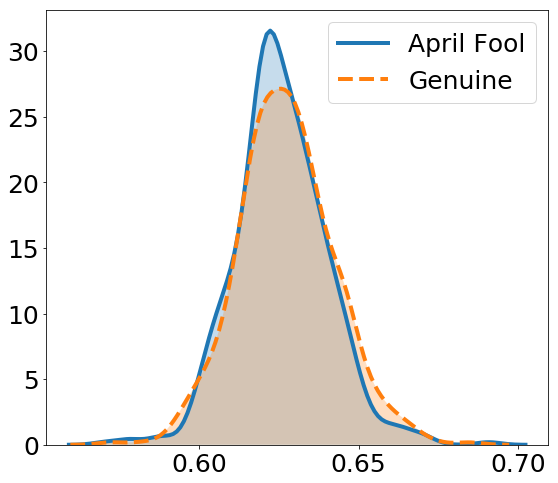

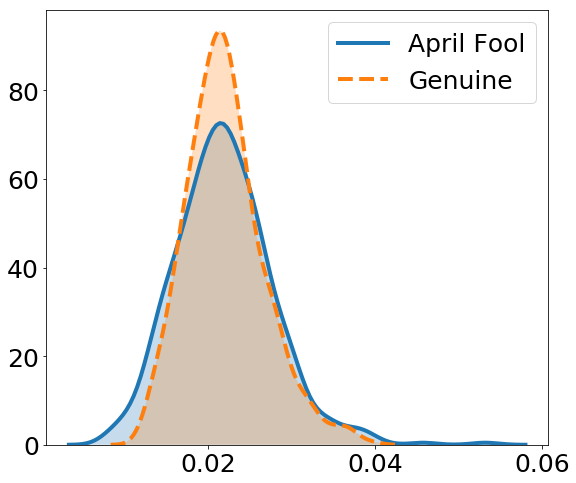

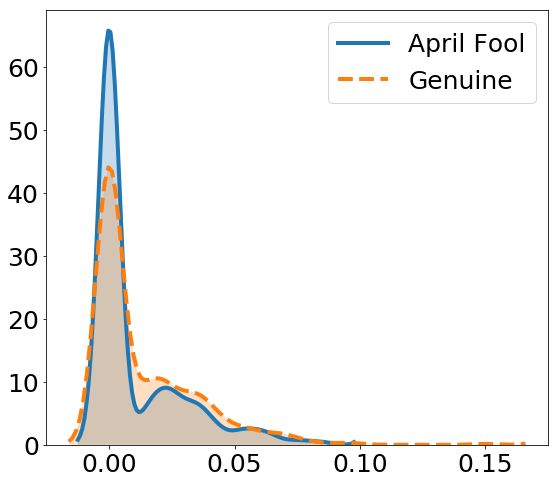

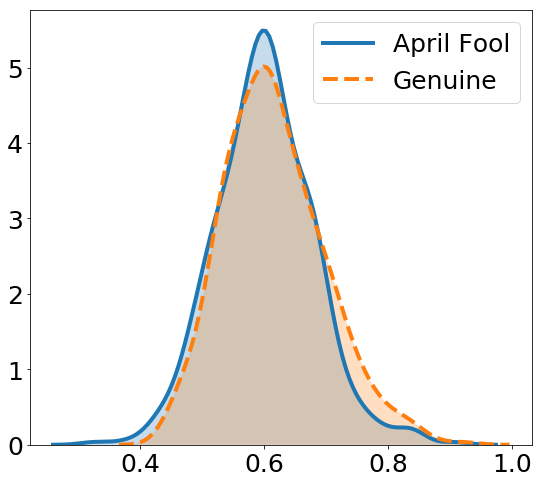

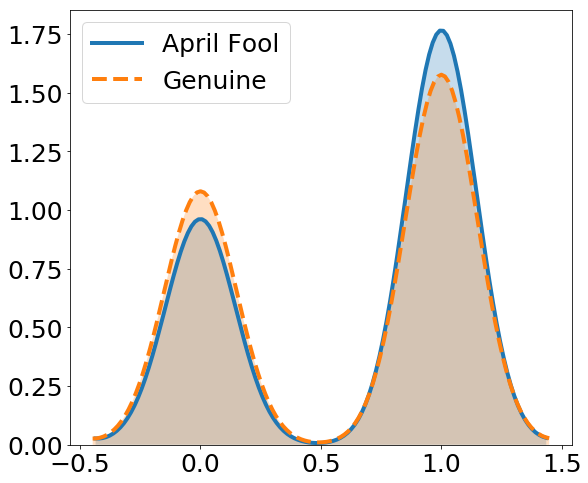

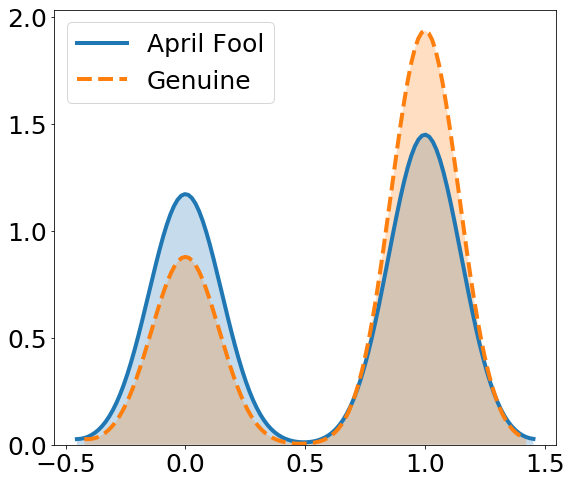

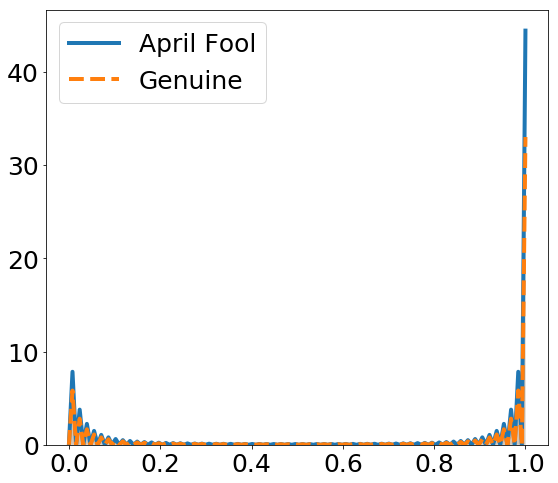

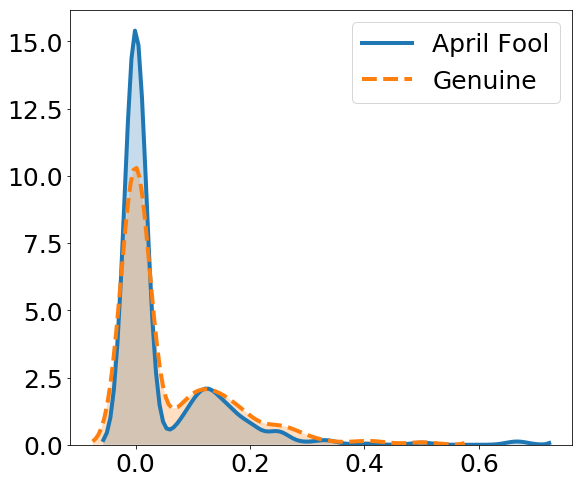

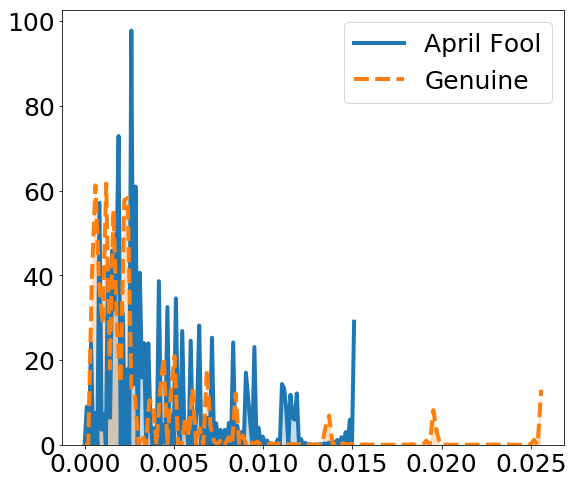

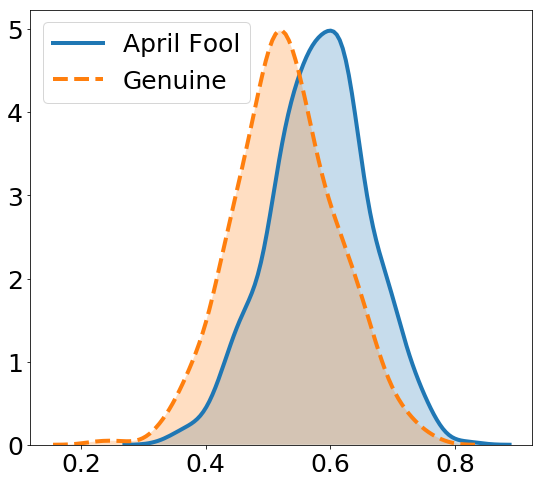

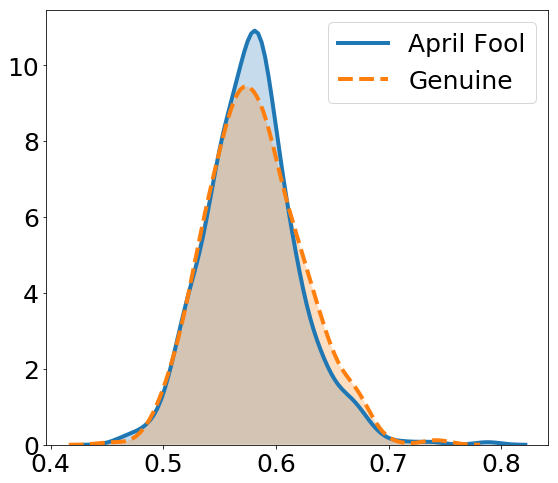

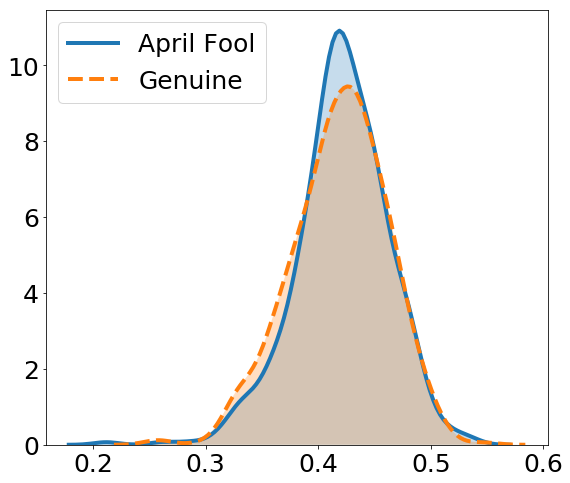

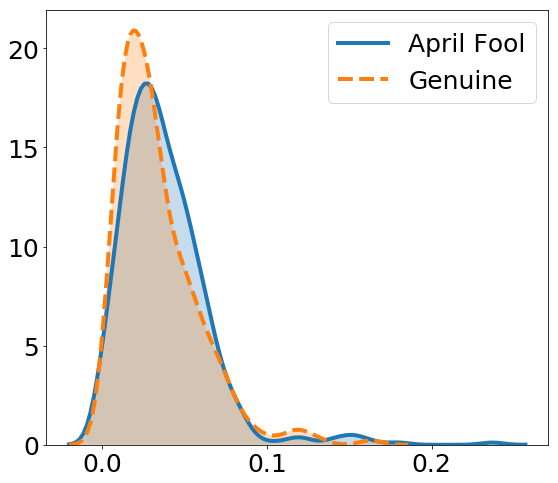

In [18]:
# Save density plots for all AF feats
for feature in af.columns[1:-1]:
    fig = af_shaded_density_plot(feature)
    fig.savefig("graphs/all_af/af_{}_density.pdf".format(feature), bbox_inches='tight')

/home/ed/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


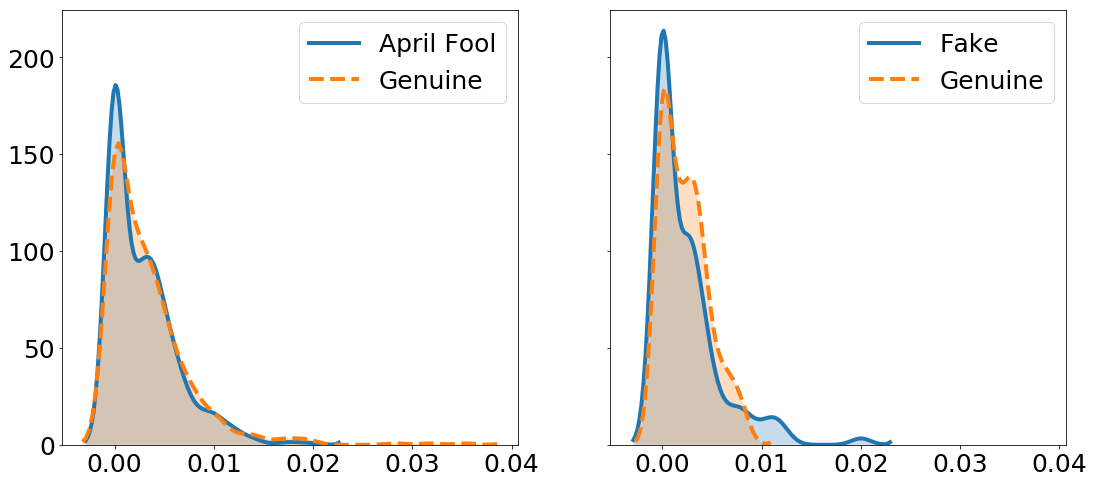

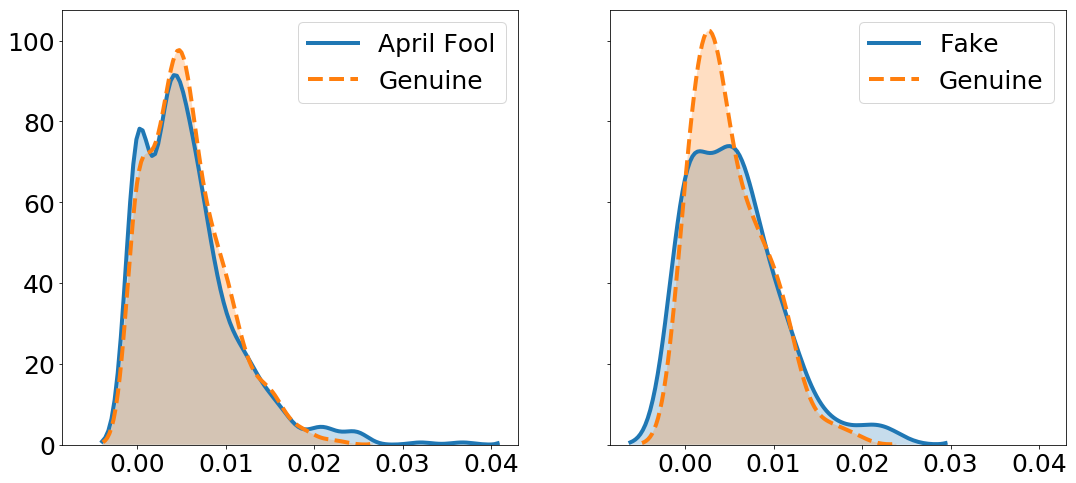

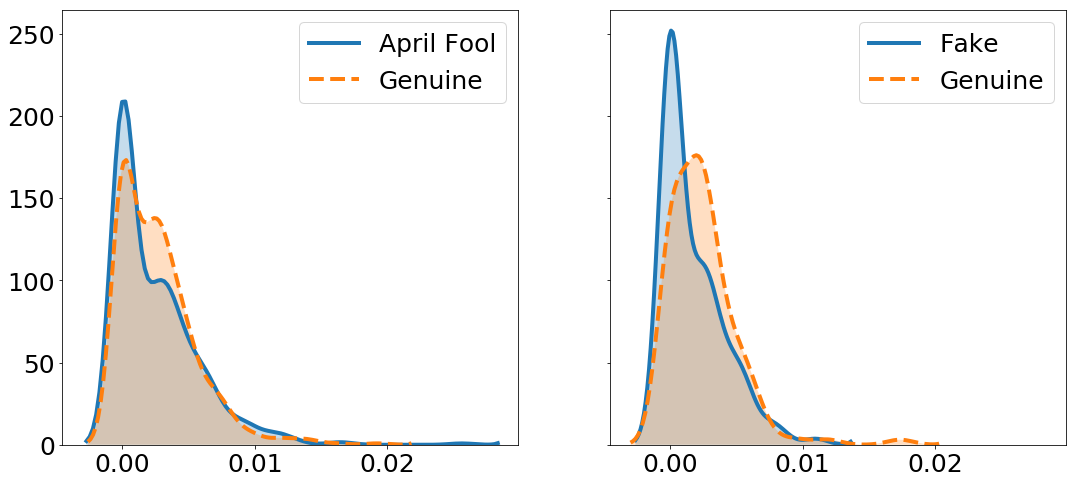

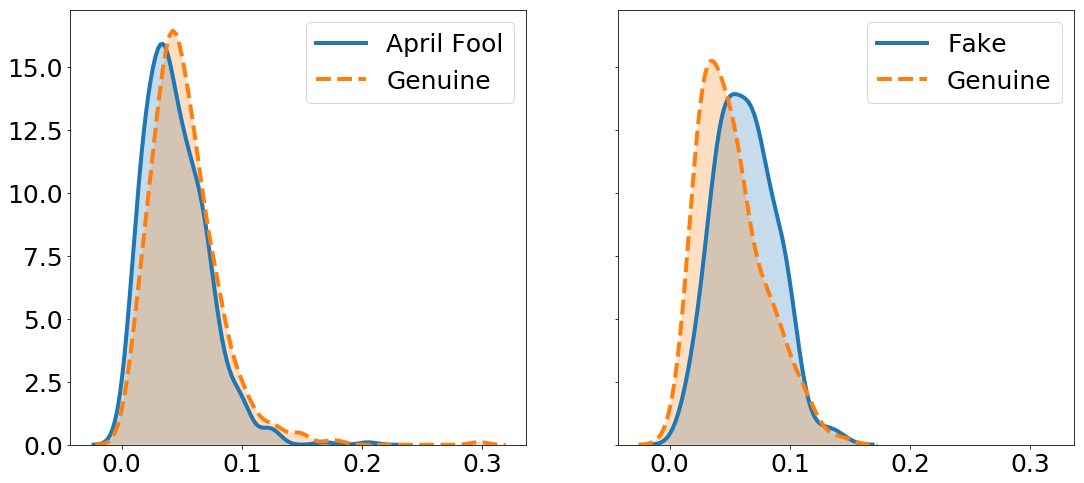

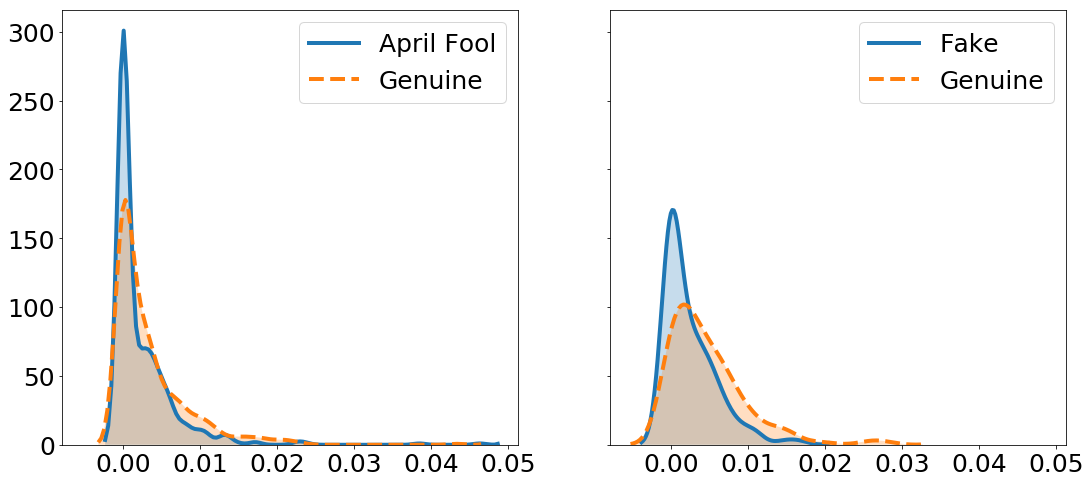

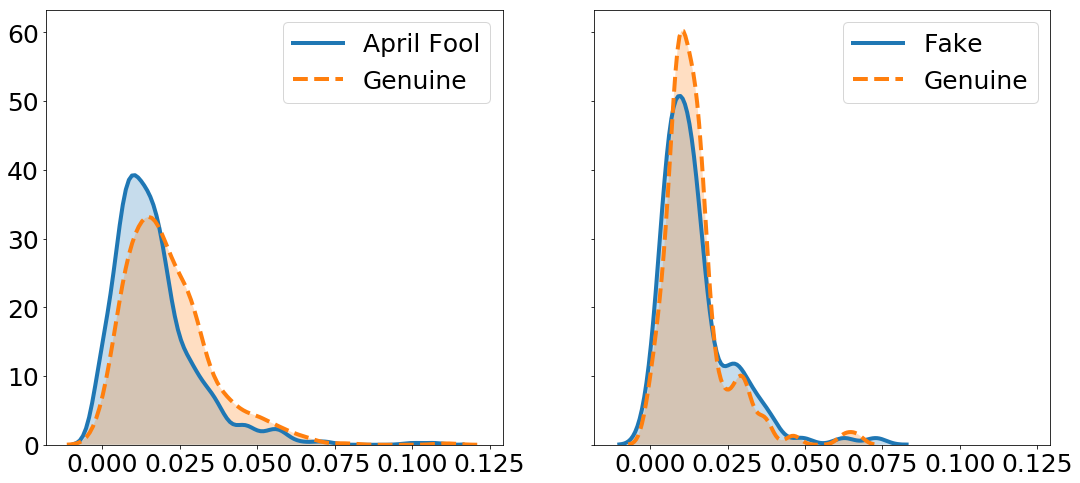

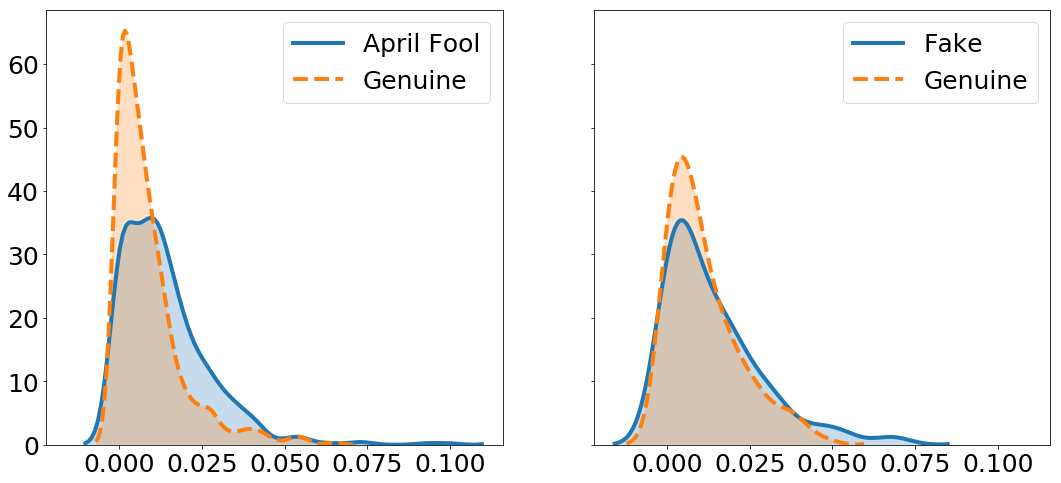

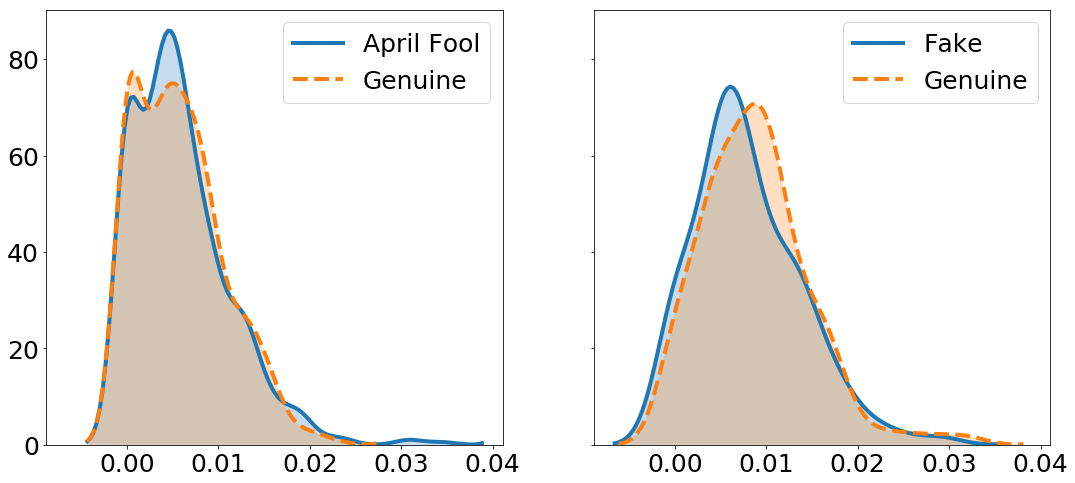

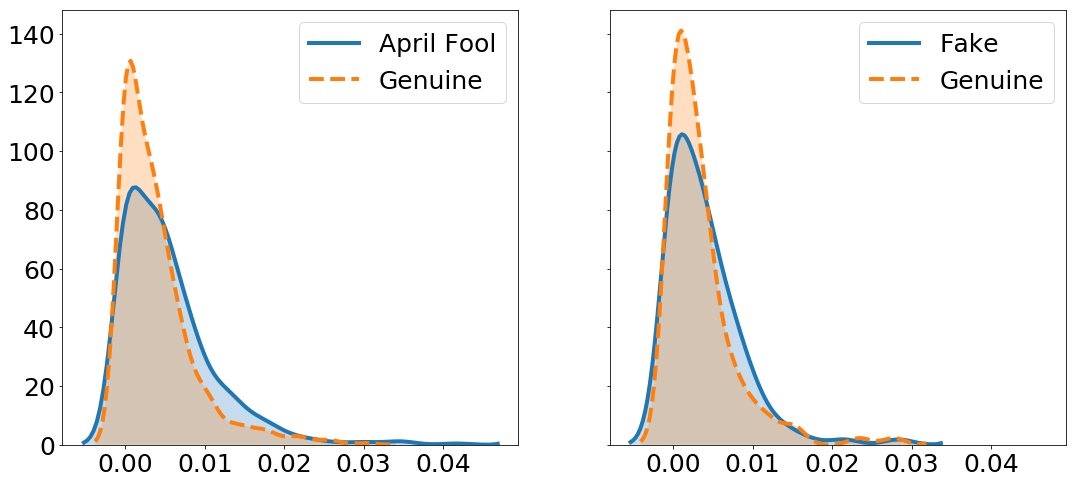

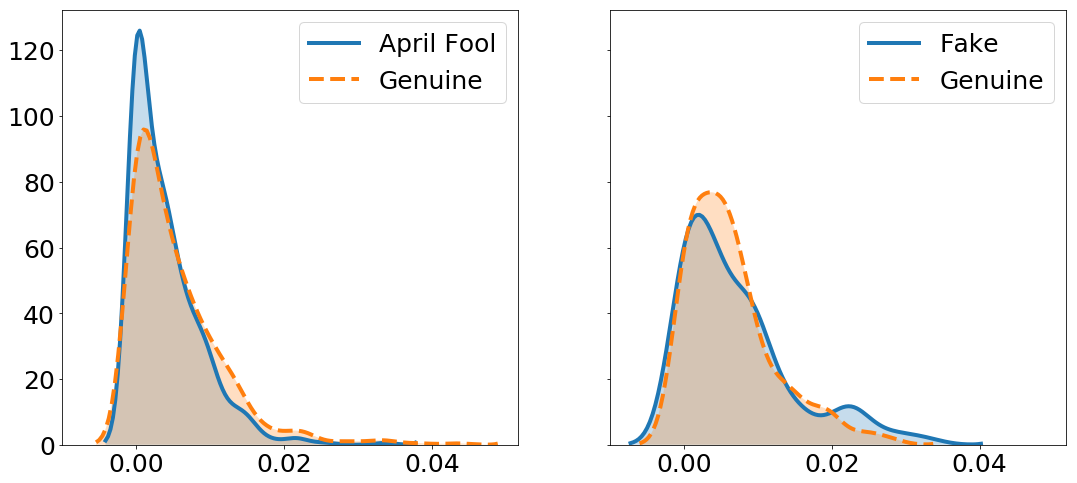

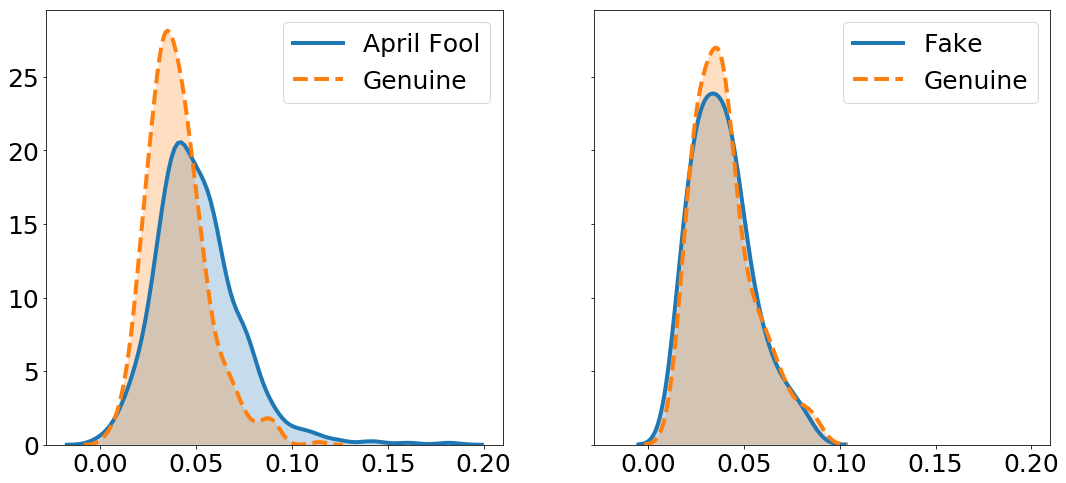

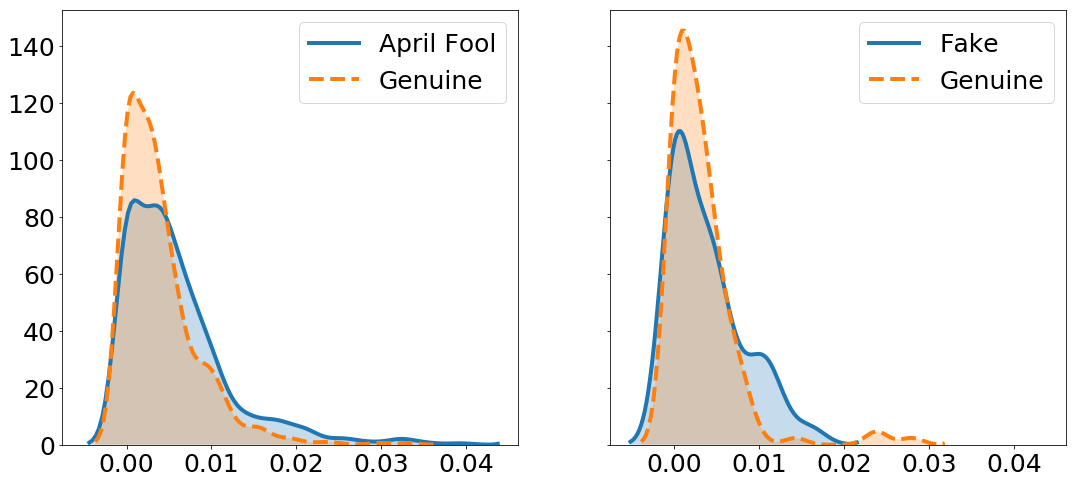

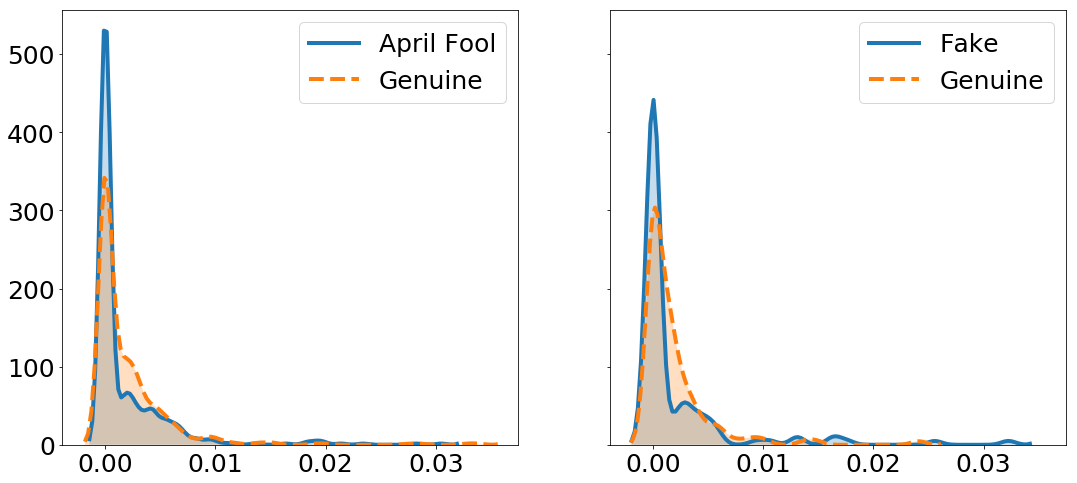

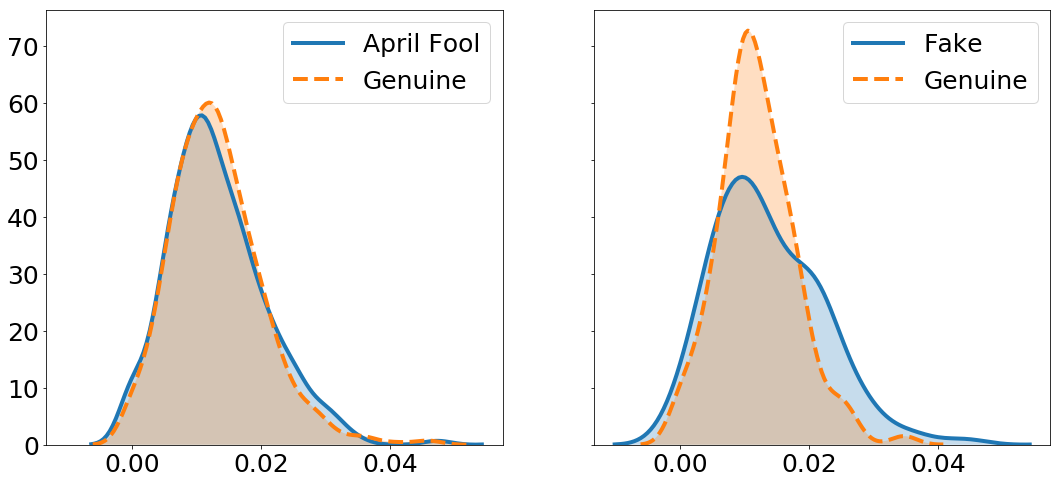

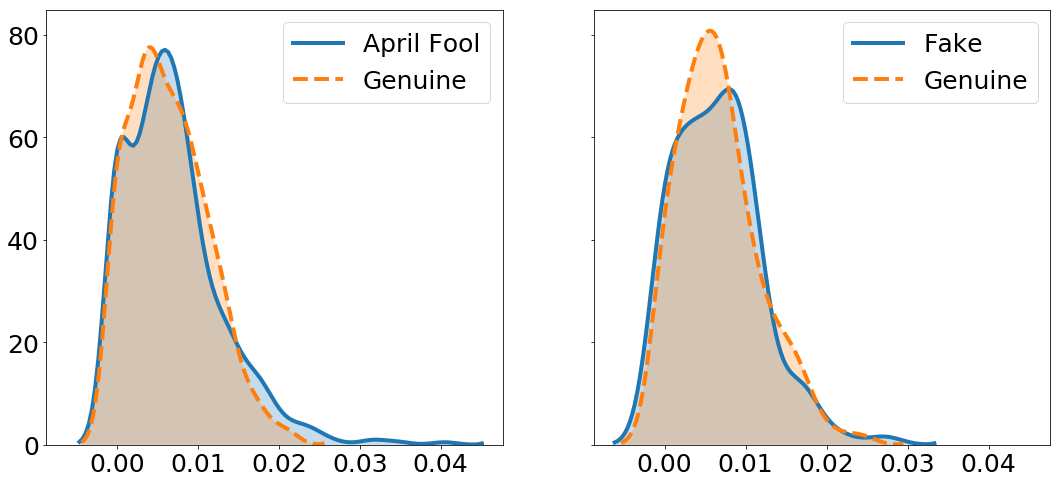

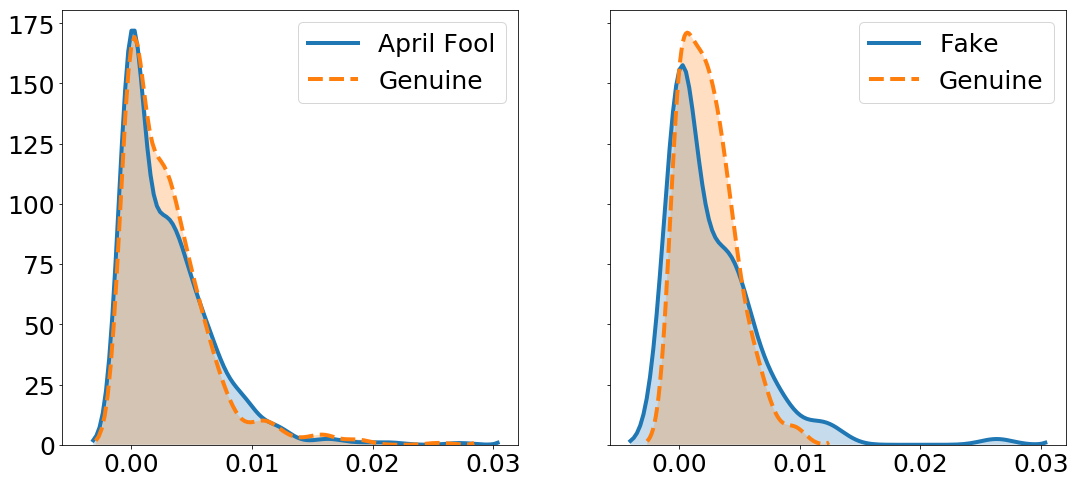

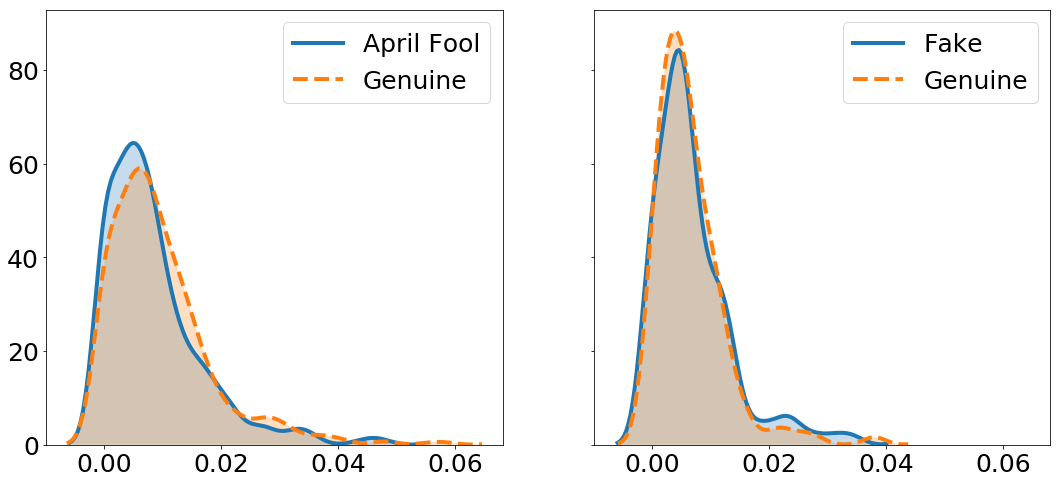

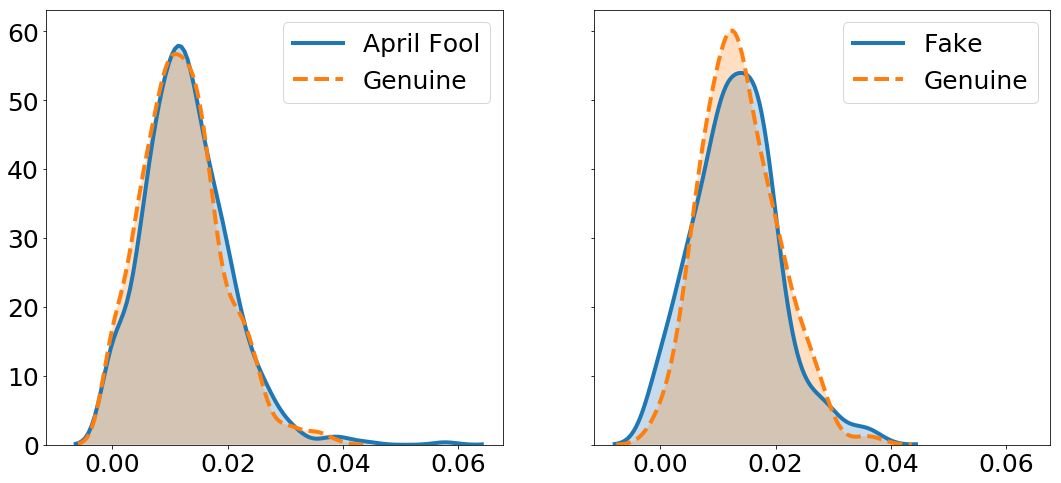

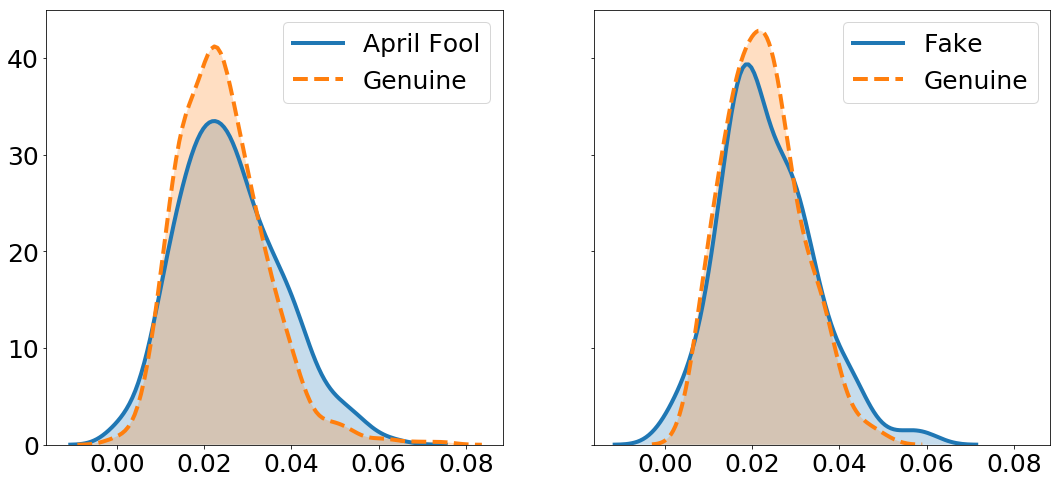

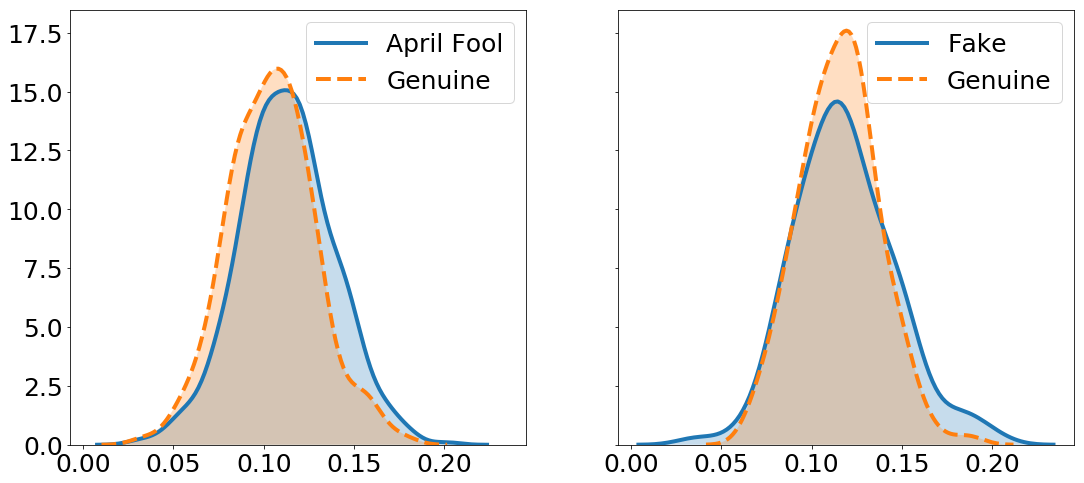

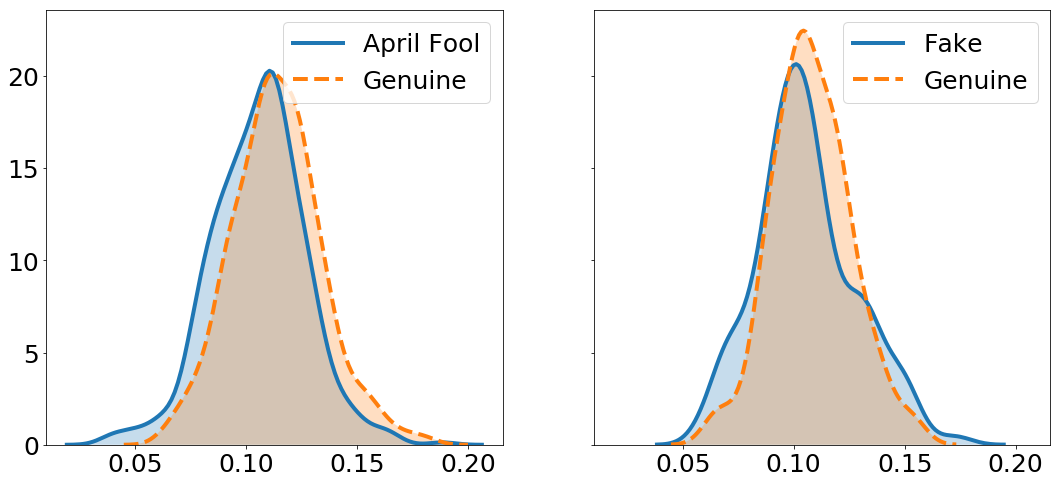

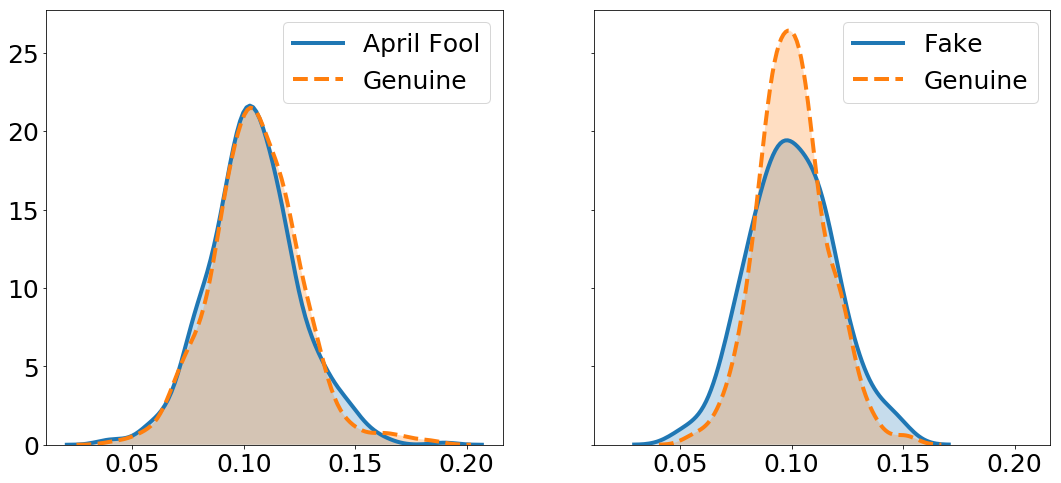

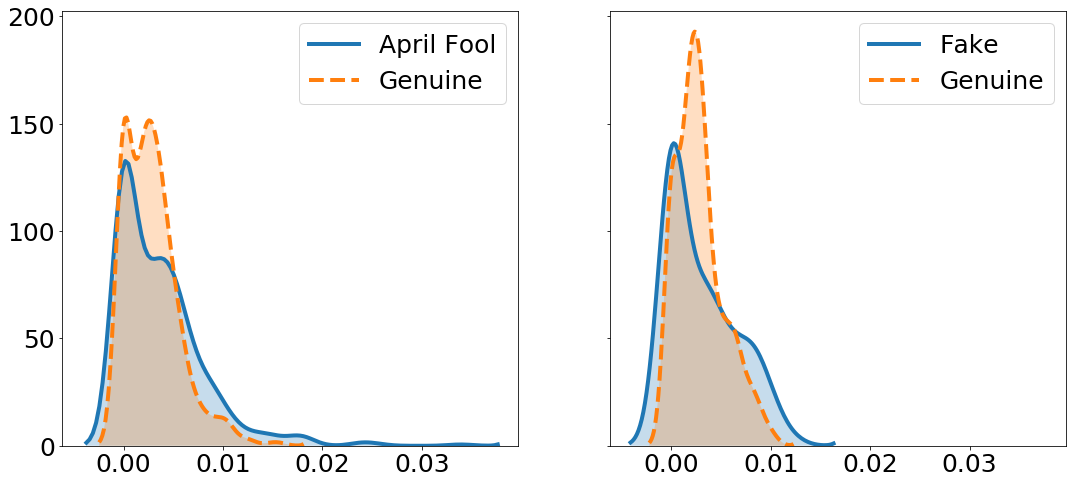

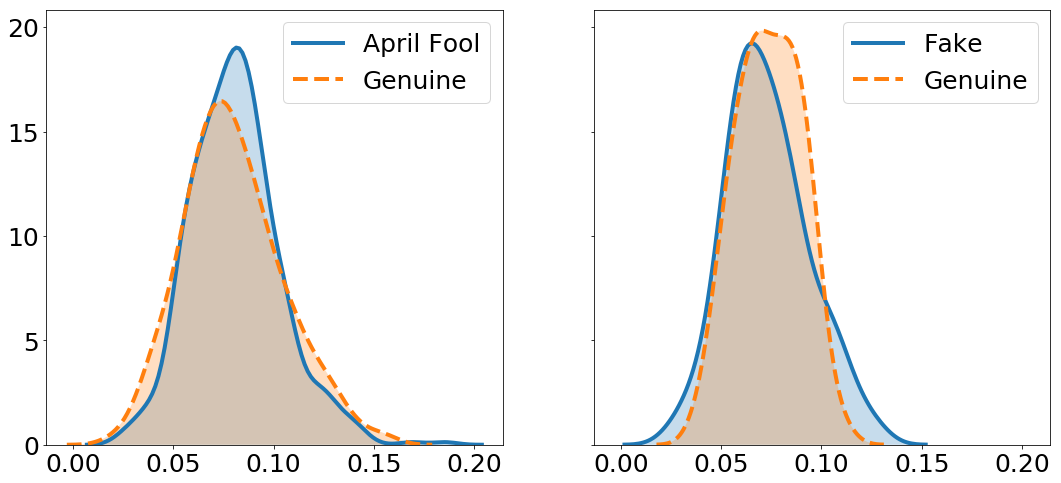

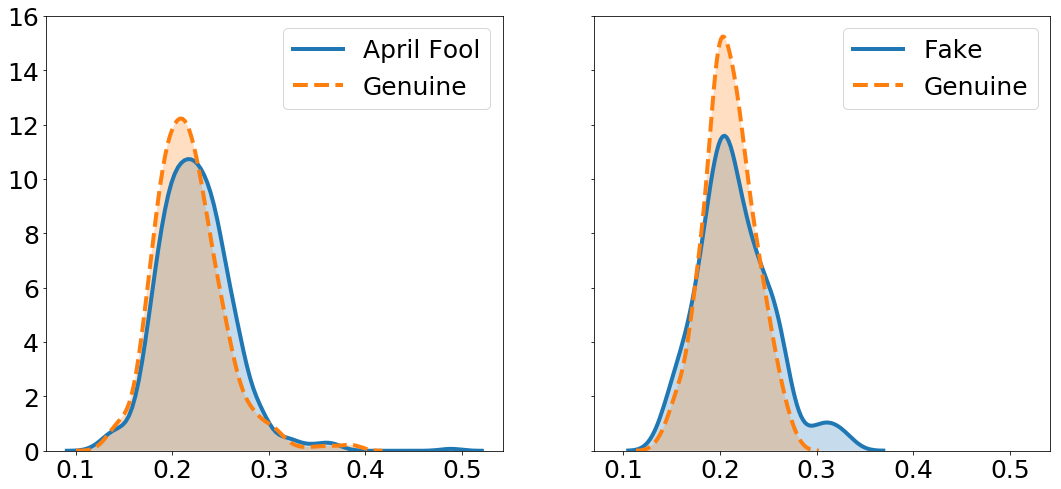

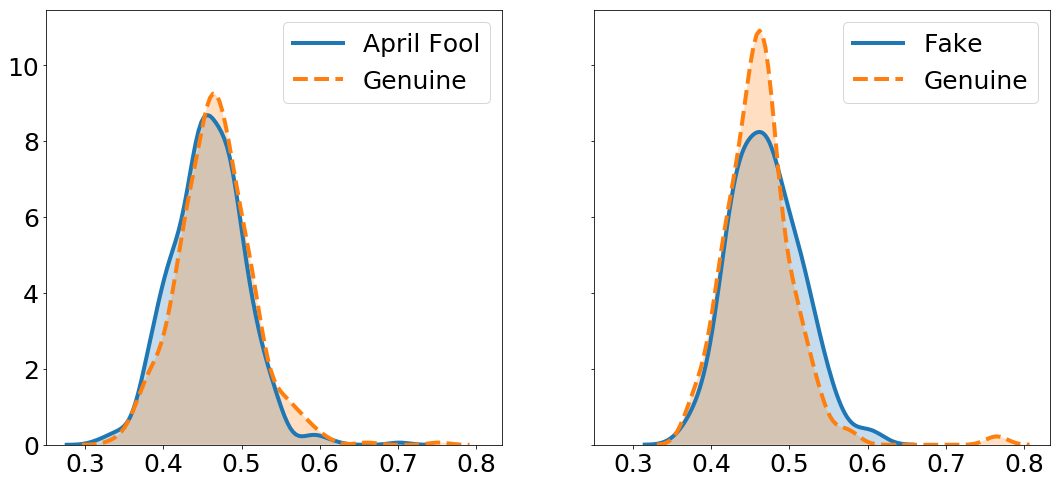

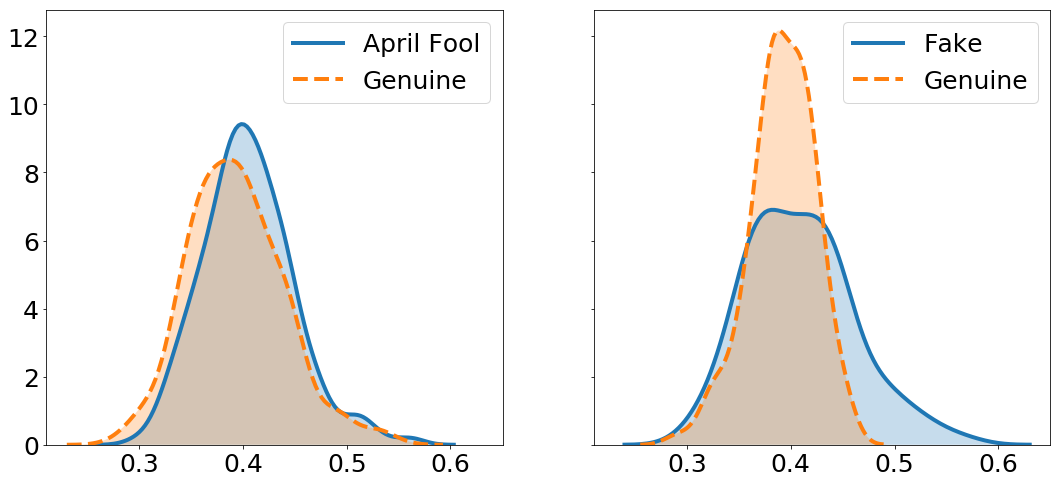

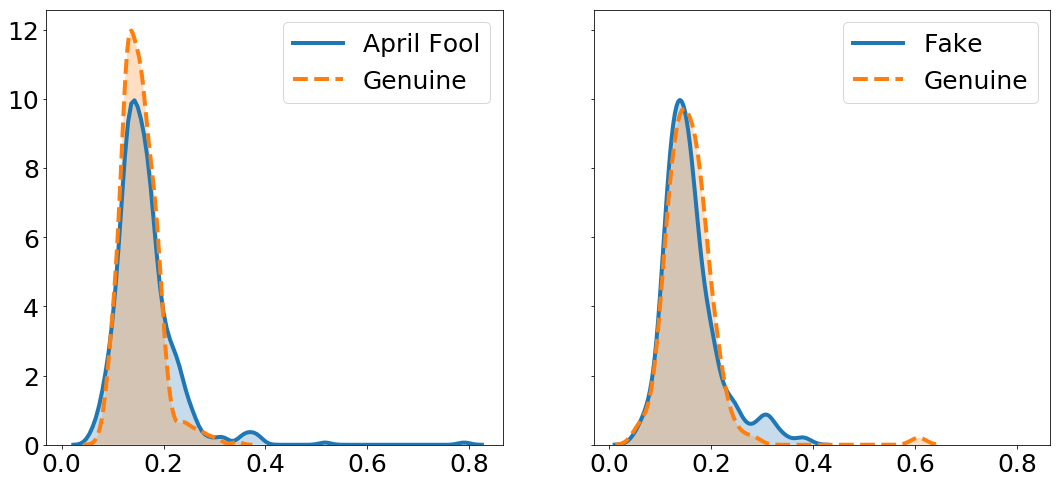

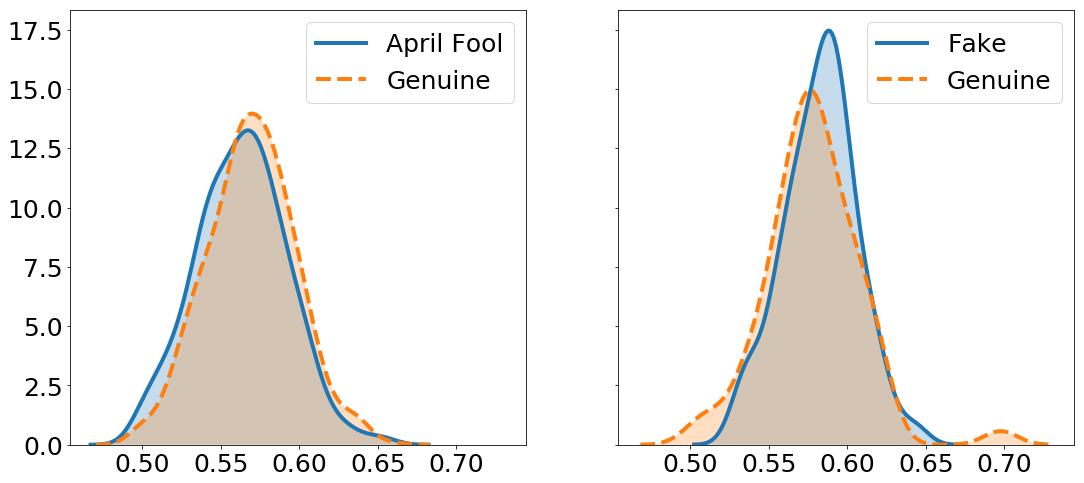

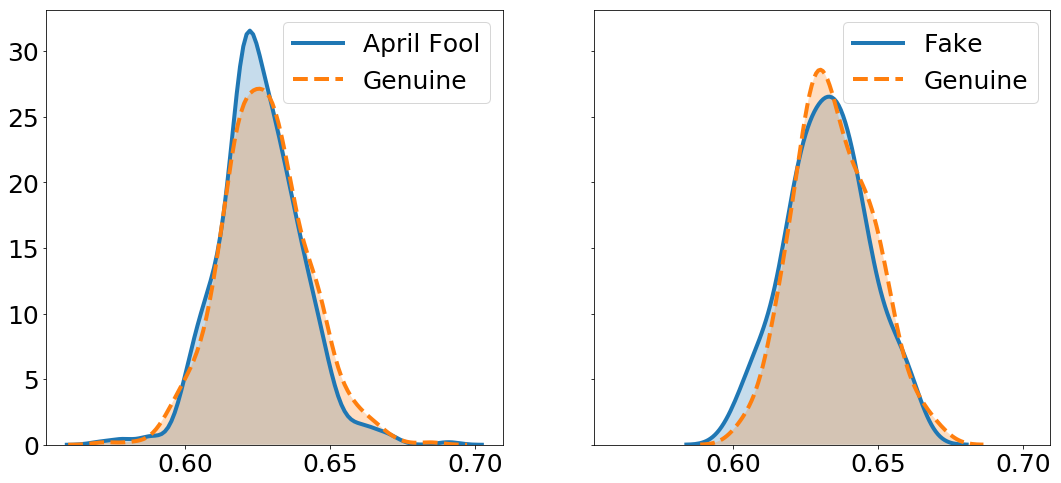

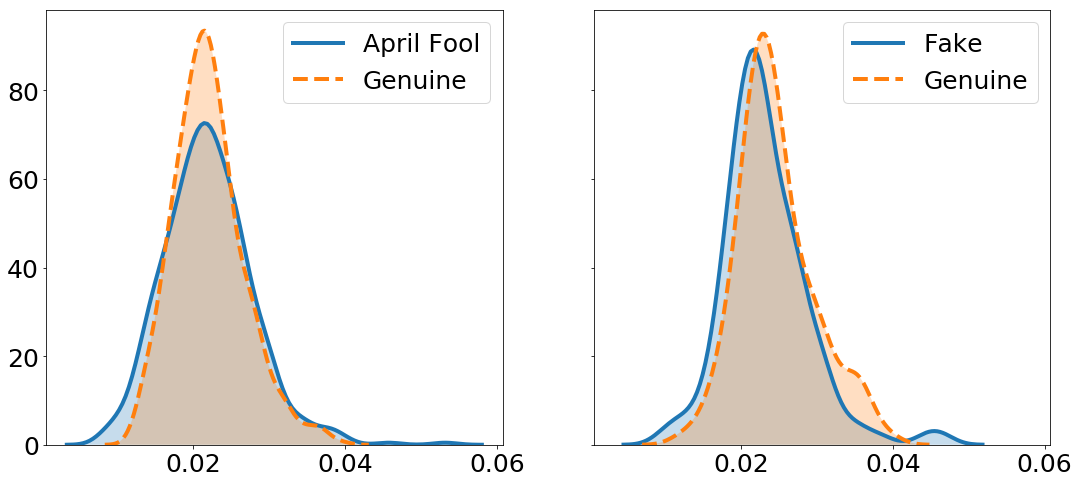

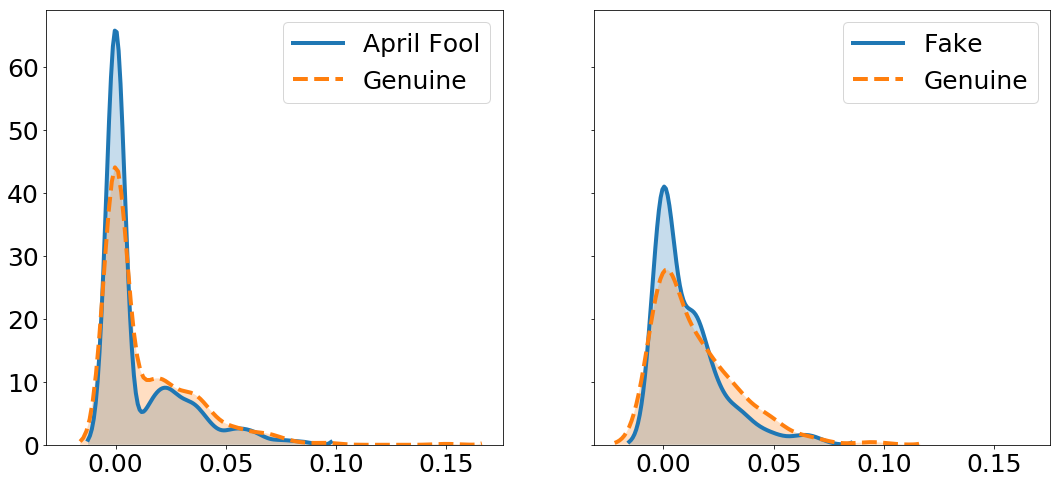

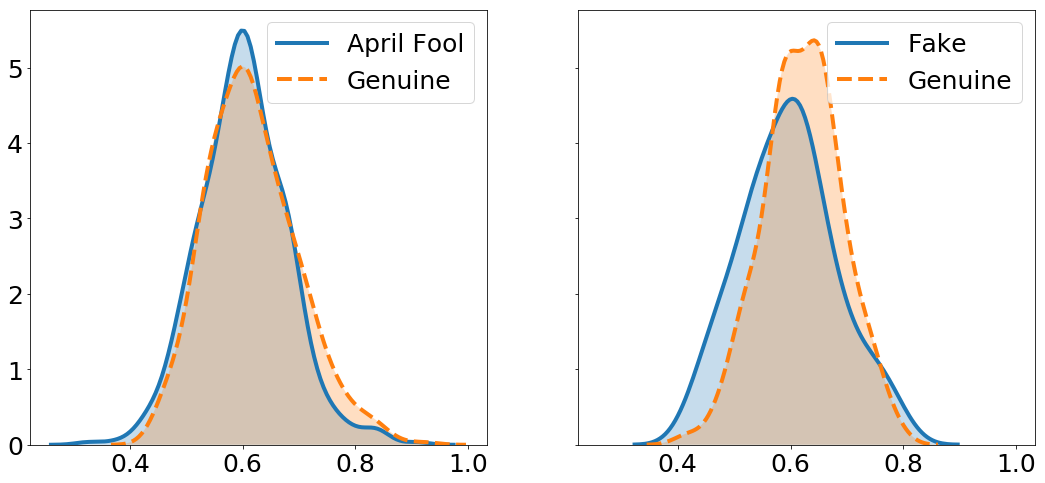

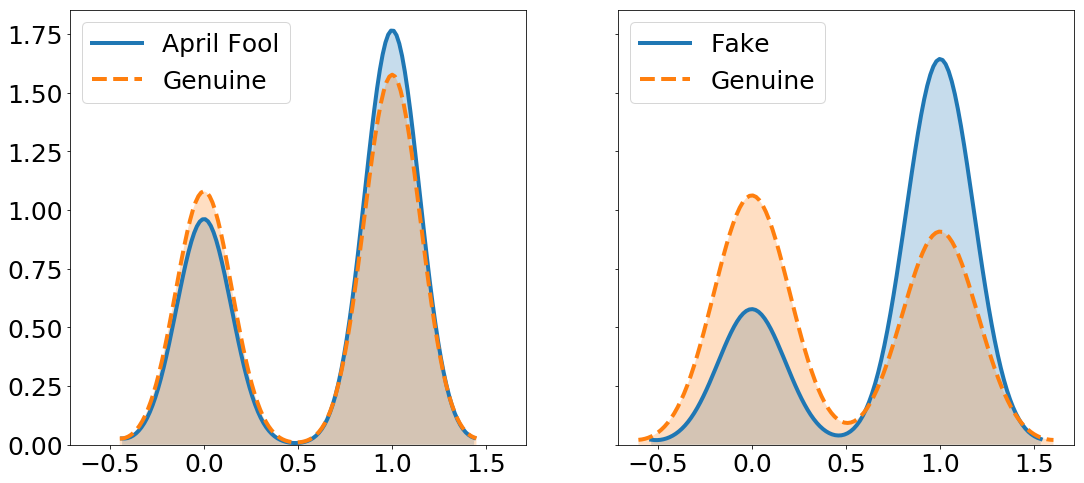

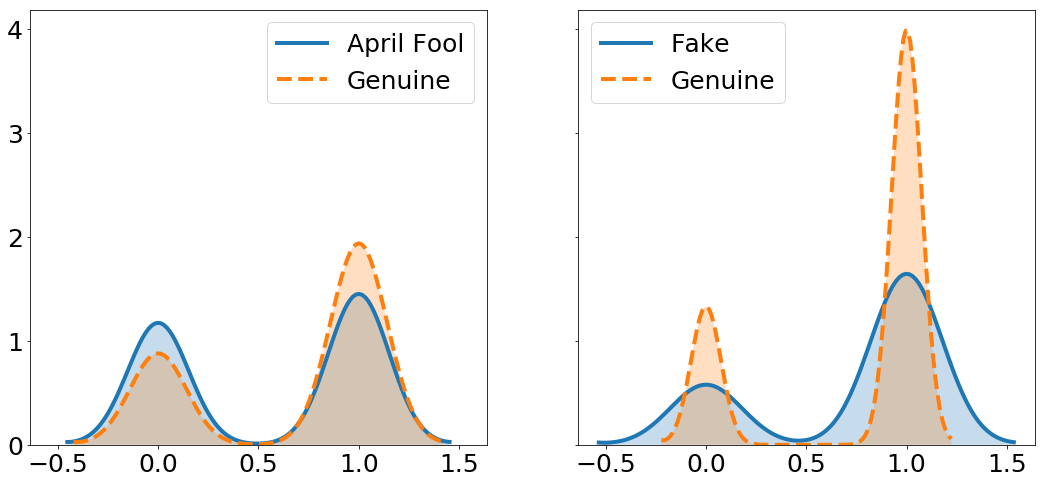

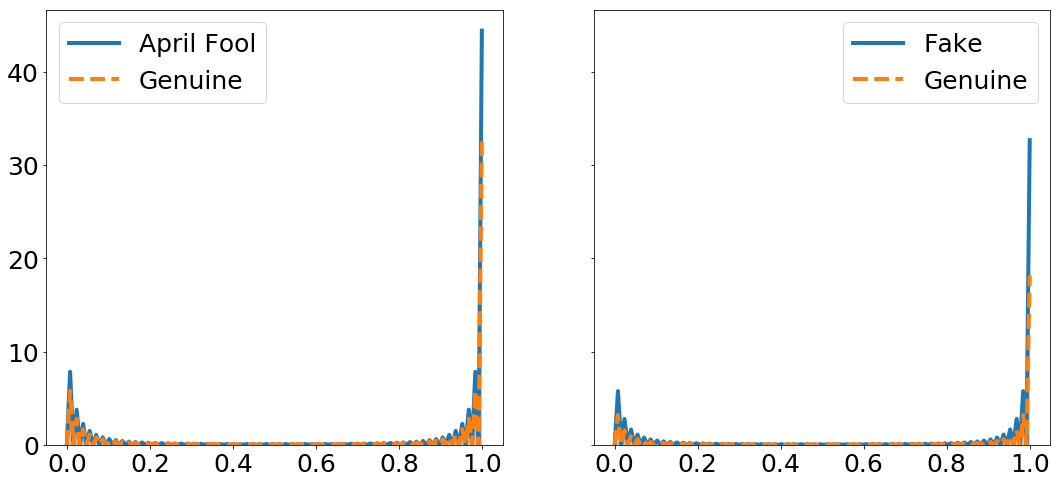

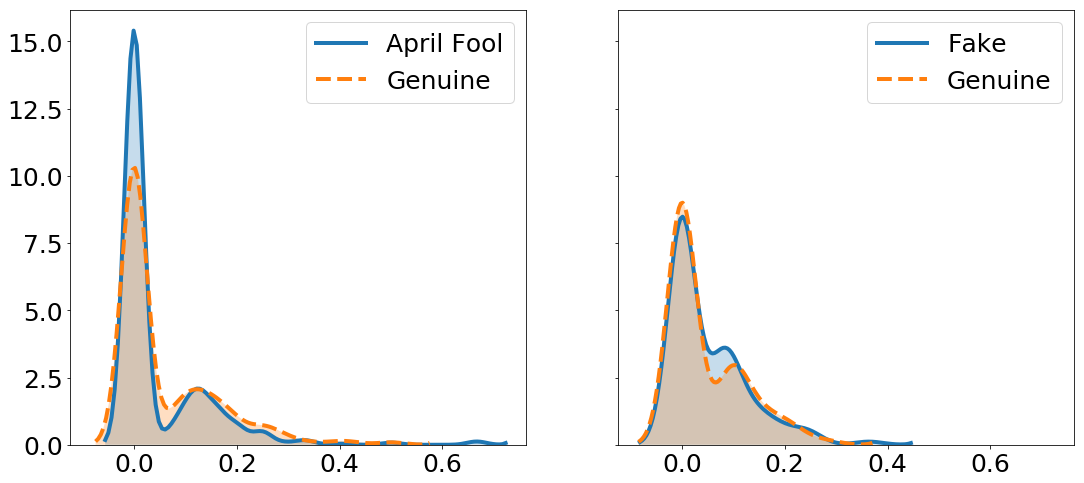

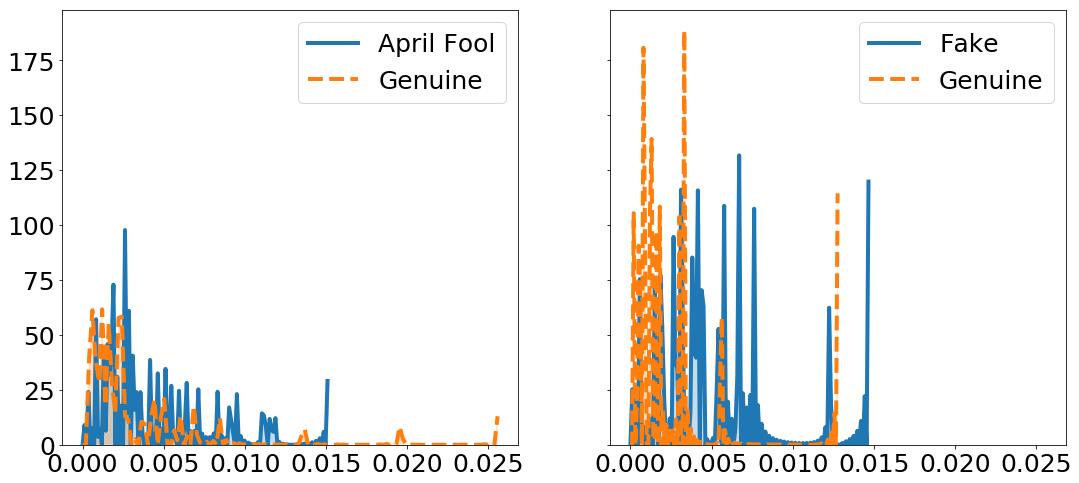

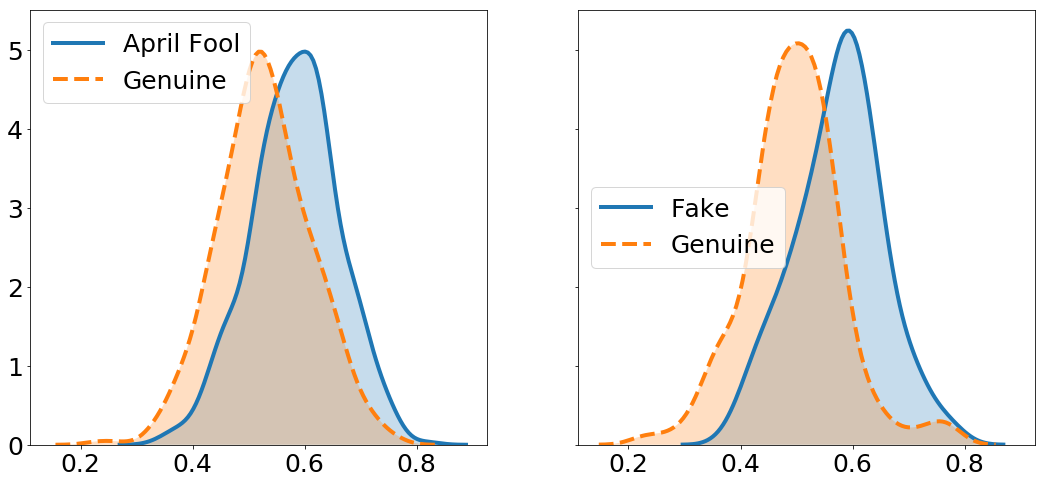

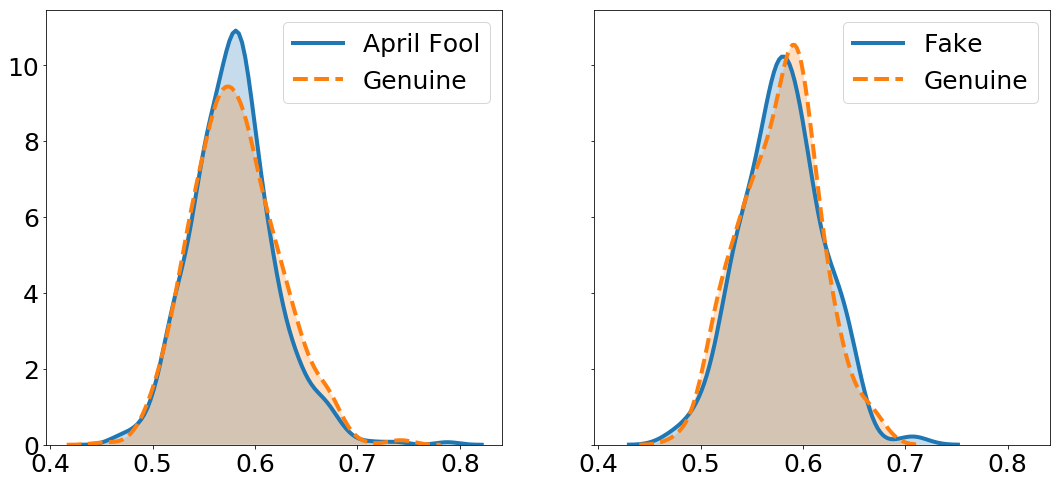

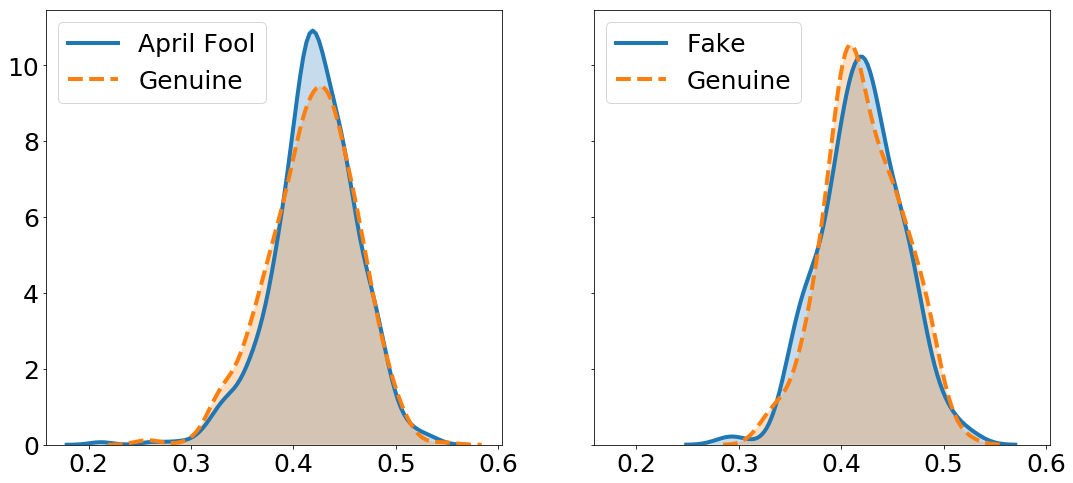

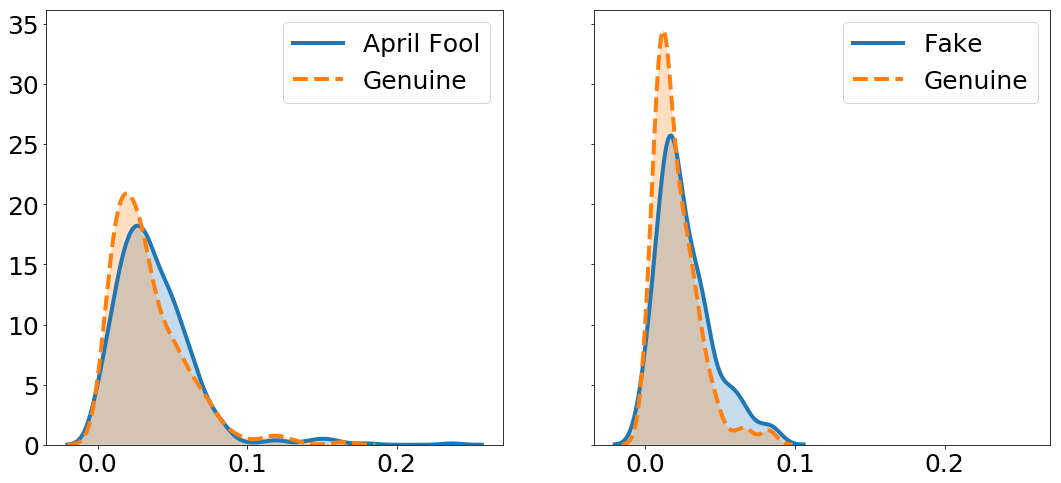

In [19]:
# Save density plots for all feats (AF and Fake)
for feature in af.columns[1:-1]:
    fig = shaded_density_plot(feature)
    fig.savefig("graphs/All/{}_density.pdf".format(feature), bbox_inches='tight')

/home/ed/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


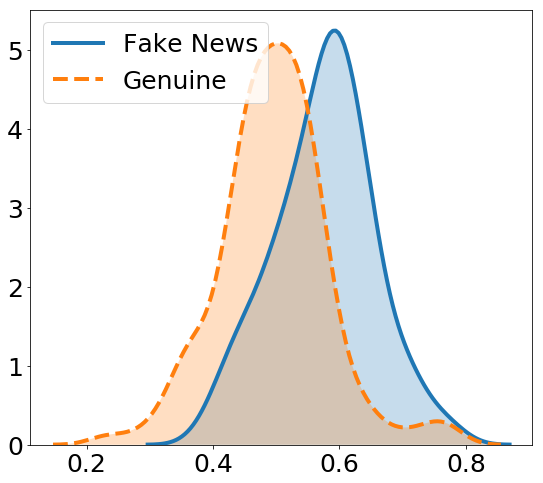

In [20]:
feature = 'lexical_diversity'
fig = fake_shaded_density_plot(feature)
fig.savefig("graphs/fake_{}_density.pdf".format(feature), bbox_inches='tight')

/home/ed/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


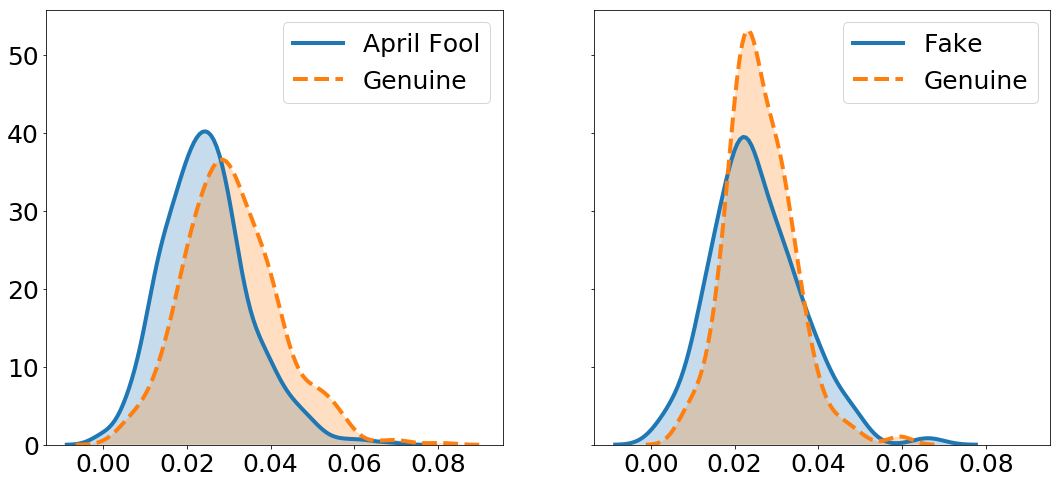

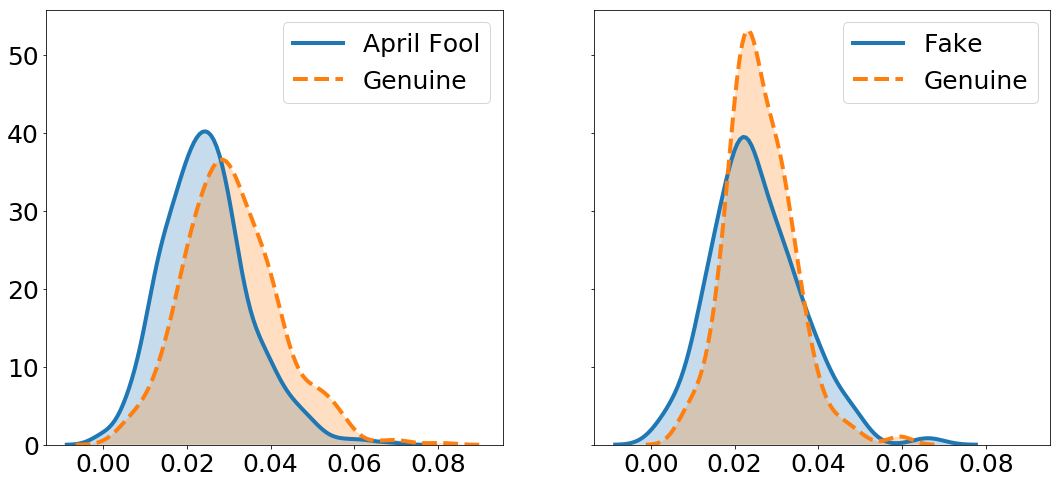

In [26]:
bop_shaded_density_plot('CC')

0.00010571449218416988


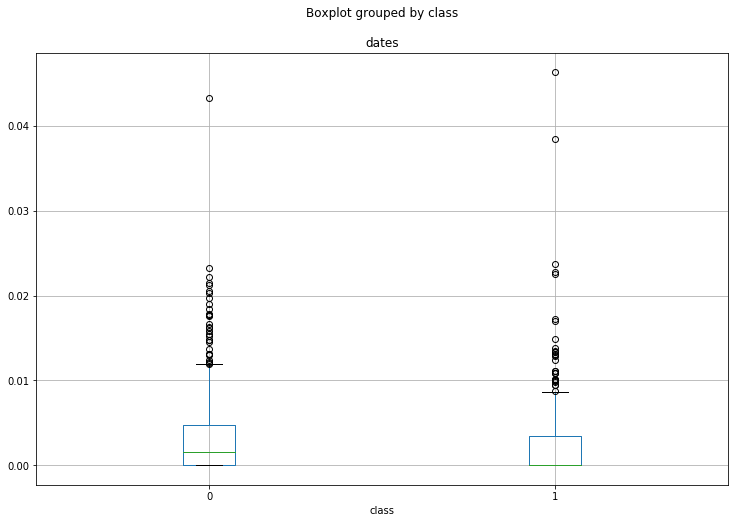

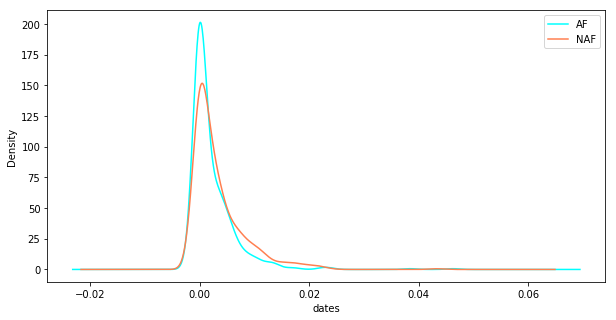

3.333466355881585e-05


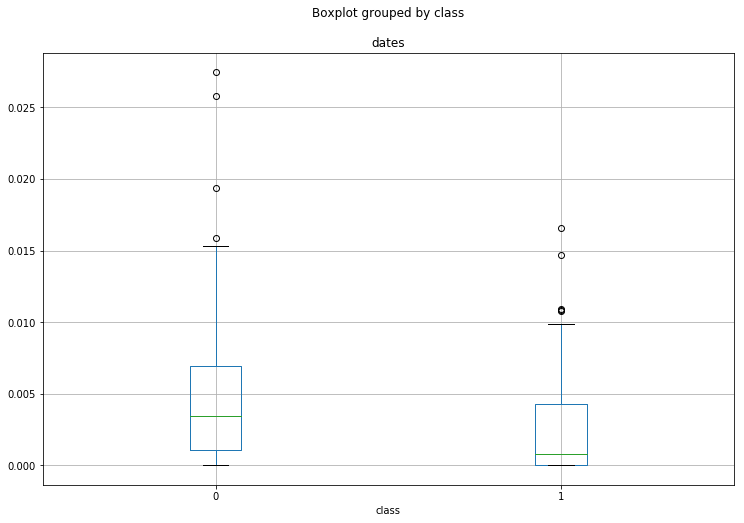

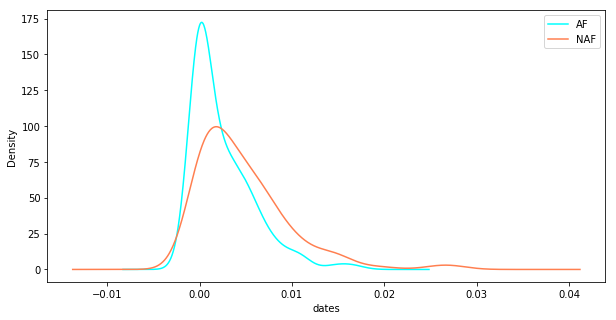

In [22]:
feature = 'dates'
F, p = ANOVA(feature)
print(p)
plot_feature_density(feature)

F, p = ANOVA(feature, fakes)
print(p)
plot_feature_density(feature, AF=fak, NAF=gen)

KeyError: 'the label [quote_proportion] is not in the [columns]'

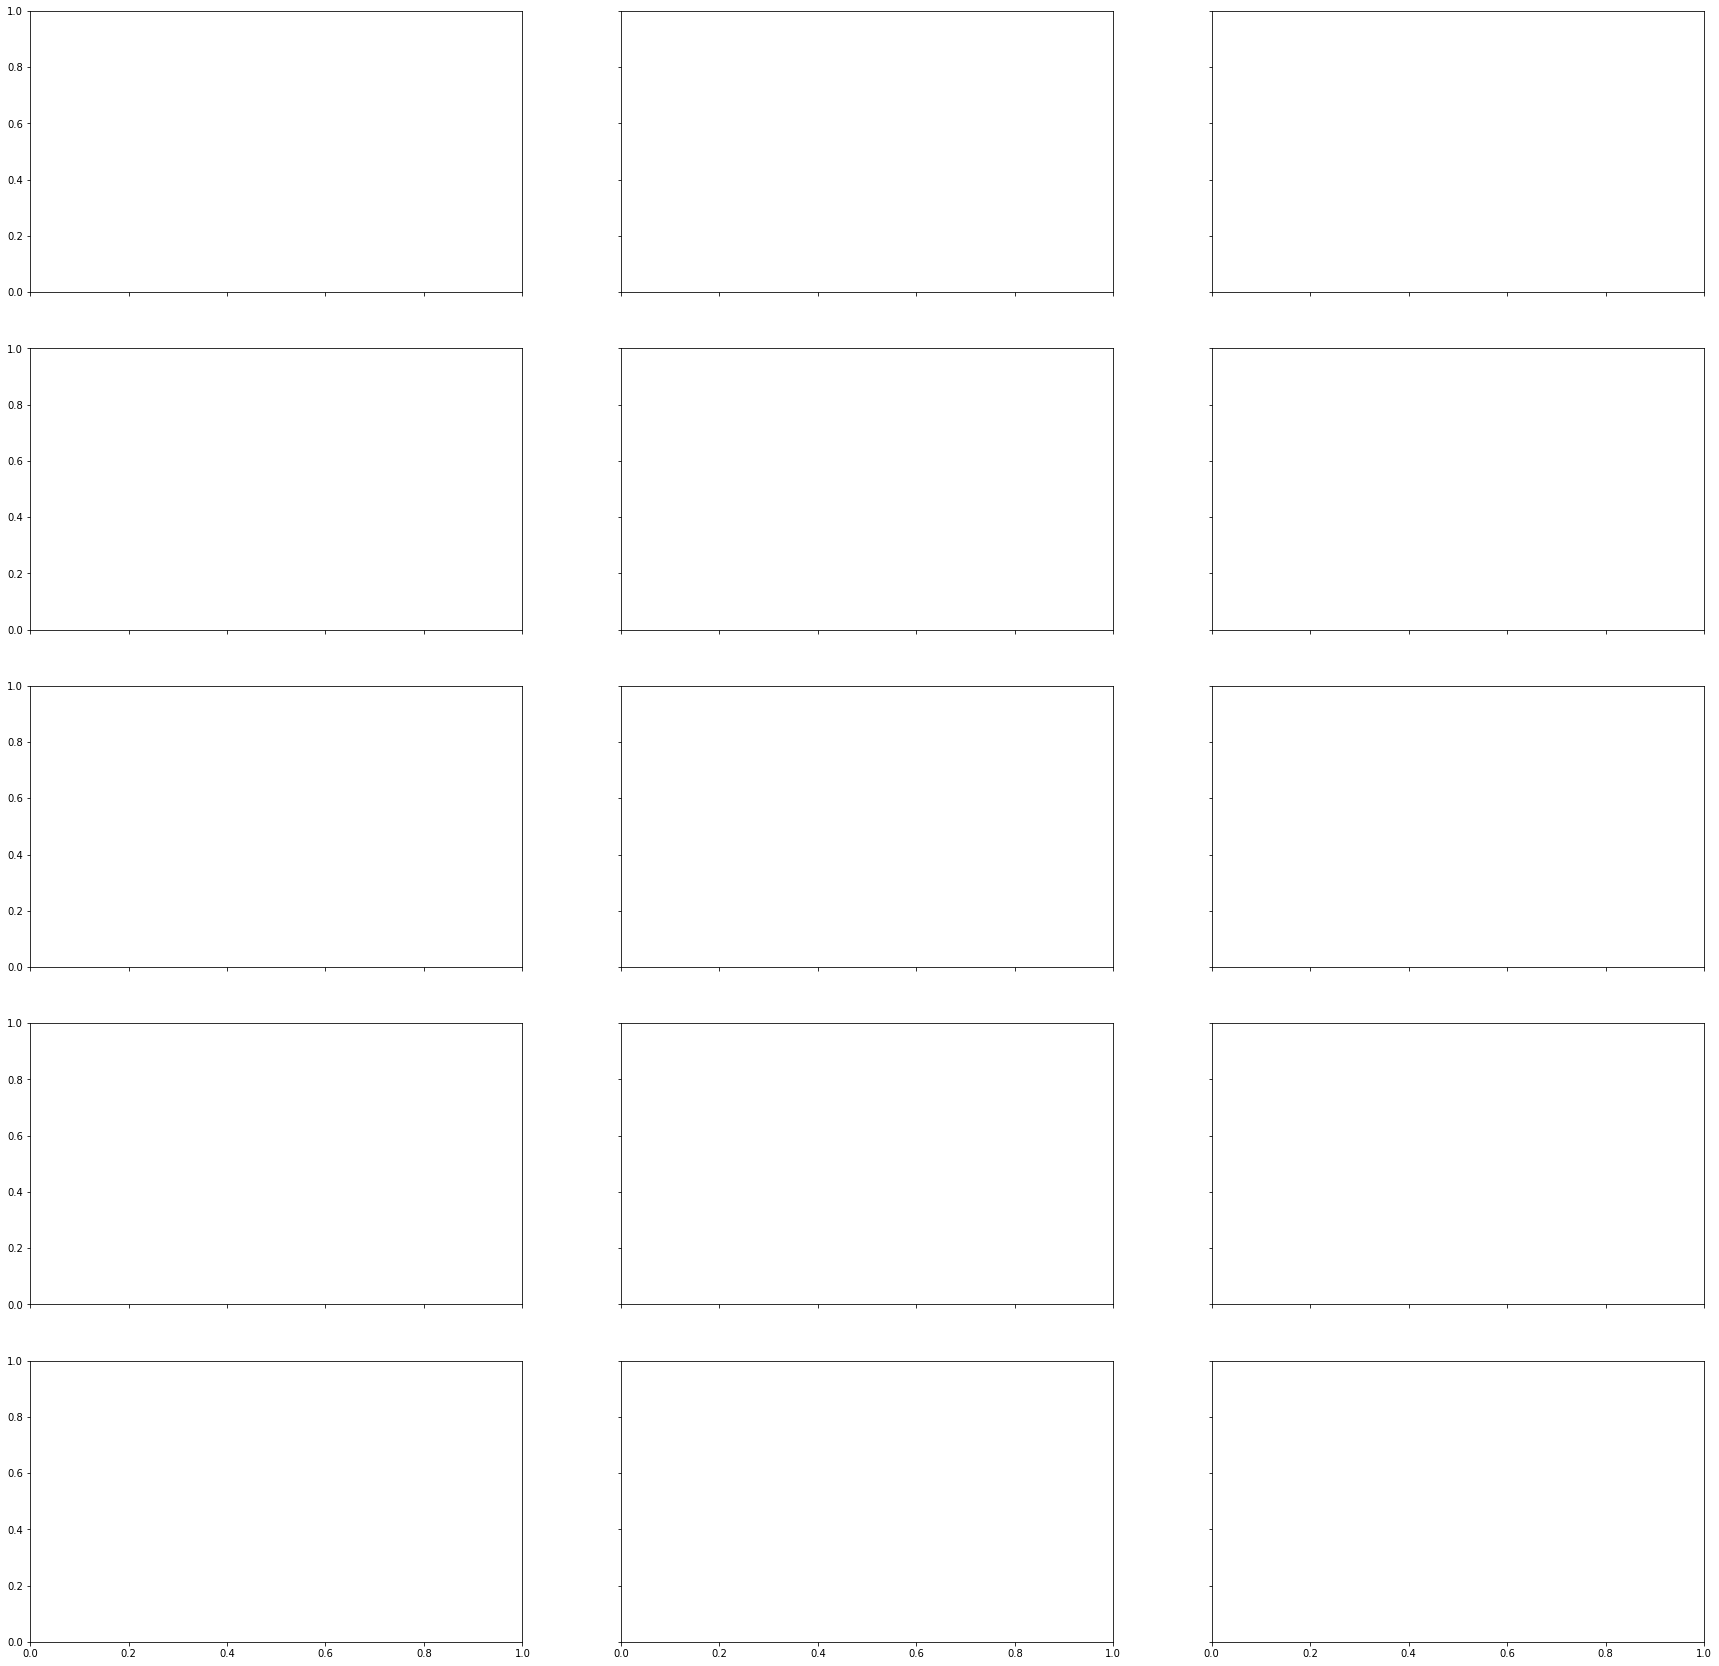

In [23]:
f, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, ax11, ax12), (ax13, ax14, ax15)) = plt.subplots(5, 3, sharex=True, sharey=True, figsize=(30, 30))

axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14, ax15]

features = []
with open('../System/feature_sets/complexity.txt') as file:
    for line in file:
        features.append(line.strip())
        
with open('../System/feature_sets/details.txt') as file:
    for line in file:
        features.append(line.strip())
        
for feat_name, ax in zip(features, axes):
    af_feat = af.loc[:, feat_name]
    naf_feat = naf.loc[:, feat_name]

    af_feat.plot.density(label='AF', ax=ax, color='aqua', title=feat_name)
    naf_feat.plot.density(label='NAF', ax=ax, color='coral', title=feat_name)
    
plt.show()


In [ ]:
f, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, ax11, ax12), (ax13, ax14, ax15)) = plt.subplots(5, 3, sharex='col', sharey='row', figsize=(30, 30))

axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14, ax15]

features = []
with open('../System/feature_sets/complexity.txt') as file:
    for line in file:
        features.append(line.strip())
        
with open('../System/feature_sets/details.txt') as file:
    for line in file:
        features.append(line.strip())
        
for feat_name, ax in zip(features, axes):
    af_feat = af.loc[:, feat_name]
    naf_feat = naf.loc[:, feat_name]

    feats.boxplot(feat_name, by='class', ax=ax)
    
plt.show()